In [1]:
!git clone https://github.com/mc0505/lane-detection.git

Cloning into 'lane-detection'...
remote: Repository not found.
fatal: repository 'https://github.com/mc0505/lane-detection.git/' not found


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving images.jpg to images (1).jpg
User uploaded file "images.jpg" with length 18827 bytes


In [ ]:
from distutils.dir_util import copy_tree
import shutil
copy_tree("./lane-detection/test_images", "./test_images")
copy_tree("./lane-detection/test_videos", "./test_videos")
shutil.rmtree('./lane-detection', ignore_errors=False, onerror=None)

1. Color detection

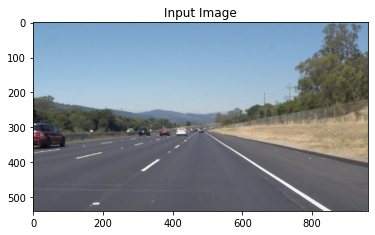

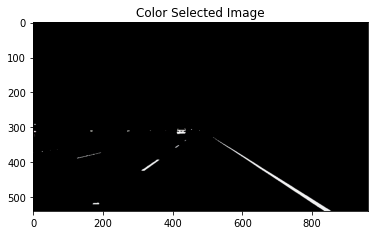

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image1 = mpimg.imread('/content/test_images/solidWhiteRight.jpg')

# Grab the x and y size and make a copy of the image
ysize = image1.shape[0]
xsize = image1.shape[1]
color_select = np.copy(image1)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image1[:,:,0] < rgb_threshold[0]) \
            | (image1[:,:,1] < rgb_threshold[1]) \
            | (image1[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image
plt.imshow(image1)
plt.title("Input Image")
plt.show()
plt.imshow(color_select)
plt.title("Color Selected Image")
plt.show()


2. Region Masking

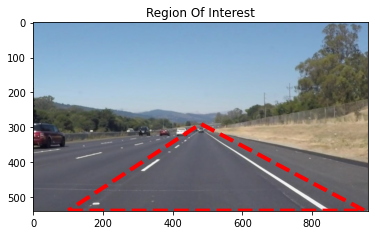

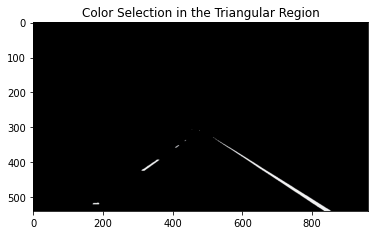

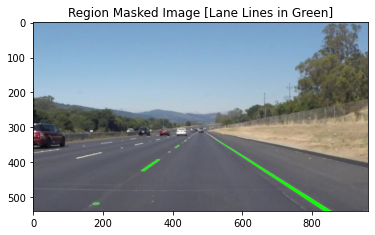

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image2 = mpimg.imread('/content/test_images/solidWhiteRight.jpg')

# Grab the x and y size and make a copy of the image
ysize = image2.shape[0]
xsize = image2.shape[1]
color_select = np.copy(image2)
line_image = np.copy(image2)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image2[:,:,0] < rgb_threshold[0]) | \
                    (image2[:,:,1] < rgb_threshold[1]) | \
                    (image2[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

# Display the image and show region and color selections
plt.imshow(image2)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection in the Triangular Region")
plt.show()
plt.imshow(line_image)
plt.title("Region Masked Image [Lane Lines in Green]")
plt.show()

*Test*

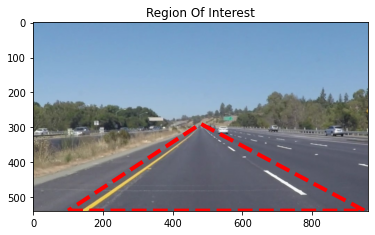

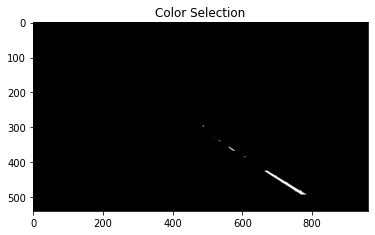

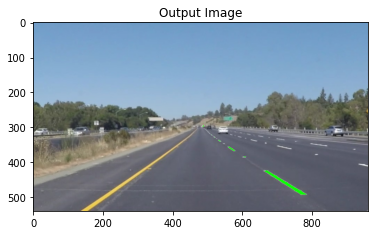

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image3 = mpimg.imread('/content/test_images/solidYellowLeft.jpg')

# Grab the x and y size and make a copy of the image
ysize = image3.shape[0]
xsize = image3.shape[1]
color_select = np.copy(image3)
line_image = np.copy(image3)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image3[:,:,0] < rgb_threshold[0]) | \
                    (image3[:,:,1] < rgb_threshold[1]) | \
                    (image3[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

# Display the image and show region and color selections
plt.imshow(image3)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection")
plt.show()
plt.imshow(line_image)
plt.title("Output Image")
plt.show()

3. Canny Edge Detection

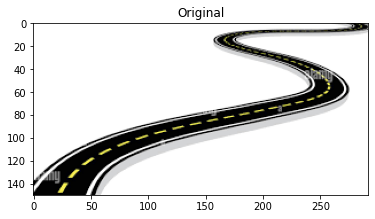

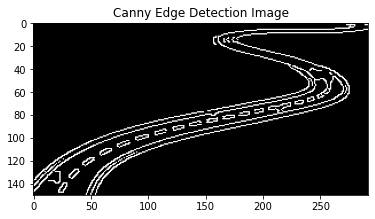

In [ ]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
# Note: in the previous example we were reading a .jpg
# Here we read a .png and convert to 0,255 bytescale
image4 = mpimg.imread('/content/images.jpg')
gray = cv2.cvtColor(image4,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(image4)
plt.title("Original")
plt.show()
plt.imshow(edges, cmap='Greys_r')
plt.title("Canny Edge Detection Image")
plt.show()

4. Hough Transform and detecting Lane Lines

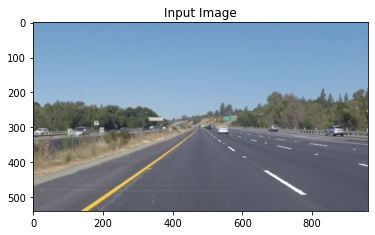

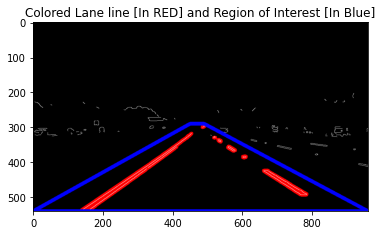

In [ ]:
# Read in and grayscale the image
image5 = mpimg.imread('test_images/solidYellowLeft.jpg')
gray = cv2.cvtColor(image5,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)
ignore_mask_color = 255

# This time we are defining a four sided polygon to mask
imshape = image5.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 5     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image5)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
lines_edges = cv2.polylines(lines_edges,vertices, True, (0,0,255), 10)
plt.imshow(image5)
plt.title("Input Image")
plt.show()
plt.imshow(lines_edges)
plt.title("Colored Lane line [In RED] and Region of Interest [In Blue]")
plt.show()

5. Lane detection pipeline (with open cv, not deep learning)


In [ ]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.

    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    NOTE: this is the function you might want to use as a starting point once you want to
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).

    Think about things like separating line segments by their
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of
    the lines and extrapolate to the top and bottom of the lane.

    This function draws `lines` with `color` and `thickness`.
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def slope_lines(image,lines):

    img = image.copy()
    poly_vertices = []
    order = [0,1,3,2]

    left_lines = [] # Like /
    right_lines = [] # Like \
    for line in lines:
        for x1,y1,x2,y2 in line:

            if x1 == x2:
                pass #Vertical Lines
            else:
                m = (y2 - y1) / (x2 - x1)
                c = y1 - m * x1

                if m < 0:
                    left_lines.append((m,c))
                elif m >= 0:
                    right_lines.append((m,c))

    left_line = np.mean(left_lines, axis=0)
    right_line = np.mean(right_lines, axis=0)
    print(left_line)
    print(right_line)

    #print(left_line, right_line)

    for slope, intercept in [left_line, right_line]:

        #getting complete height of image in y1
        rows, cols = image.shape[:2]
        y1= int(rows) #image.shape[0]

        #taking y2 upto 60% of actual height or 60% of y1
        y2= int(rows*0.6) #int(0.6*y1)

        #we know that equation of line is y=mx +c so we can write it x=(y-c)/m
        x1=int((y1-intercept)/slope)
        x2=int((y2-intercept)/slope)
        poly_vertices.append((x1, y1))
        poly_vertices.append((x2, y2))
        draw_lines(img, np.array([[[x1,y1,x2,y2]]]))

    poly_vertices = [poly_vertices[i] for i in order]
    cv2.fillPoly(img, pts = np.array([poly_vertices],'int32'), color = (0,255,0))
    return cv2.addWeighted(image,0.7,img,0.4,0.)

    #cv2.polylines(img,np.array([poly_vertices],'int32'), True, (0,0,255), 10)
    #print(poly_vertices)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.

    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #draw_lines(line_img, lines)
    line_img = slope_lines(line_img,lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.1, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.

    `initial_img` should be the image before any processing.

    The result image is computed as follows:

    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    lines_edges = cv2.addWeighted(initial_img, α, img, β, γ)
    #lines_edges = cv2.polylines(lines_edges,get_vertices(img), True, (0,0,255), 10)
    return lines_edges
def get_vertices(image):
    rows, cols = image.shape[:2]
    bottom_left  = [cols*0.15, rows]
    top_left     = [cols*0.45, rows*0.6]
    bottom_right = [cols*0.95, rows]
    top_right    = [cols*0.55, rows*0.6]

    ver = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return ver

In [ ]:
# Lane finding Pipeline
def lane_finding_pipeline(image):

    #Grayscale
    gray_img = grayscale(image)
    #Gaussian Smoothing
    smoothed_img = gaussian_blur(img = gray_img, kernel_size = 5)
    #Canny Edge Detection
    canny_img = canny(img = smoothed_img, low_threshold = 180, high_threshold = 240)
    #Masked Image Within a Polygon
    masked_img = region_of_interest(img = canny_img, vertices = get_vertices(image))
    #Hough Transform Lines
    houghed_lines = hough_lines(img = masked_img, rho = 1, theta = np.pi/180, threshold = 20, min_line_len = 20, max_line_gap = 180)
    #Draw lines on edges
    output = weighted_img(img = houghed_lines, initial_img = image, α=0.8, β=1., γ=0.)

    return output

solidYellowCurve.jpg
[ -0.73956508 663.56853146]
[ 0.56631144 45.54417086]


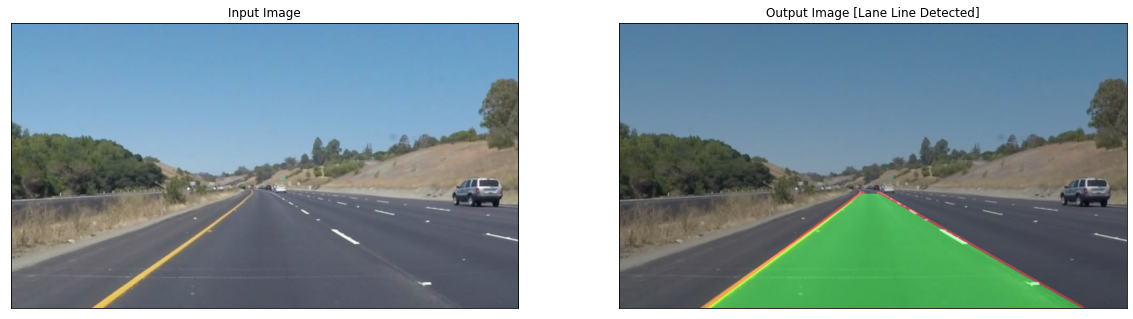

whiteCarLaneSwitch.jpg
[ -0.74977844 674.39015132]
[ 0.57752337 32.88396053]


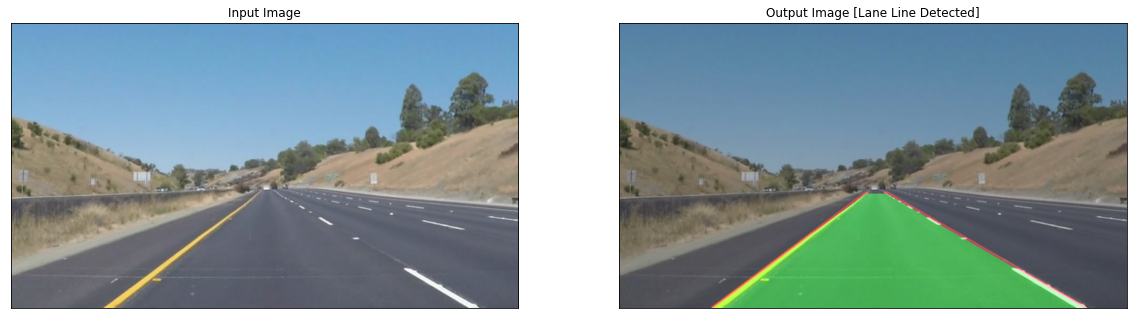

solidYellowCurve2.jpg
[ -0.74031328 663.85953788]
[ 0.58557332 30.85141857]


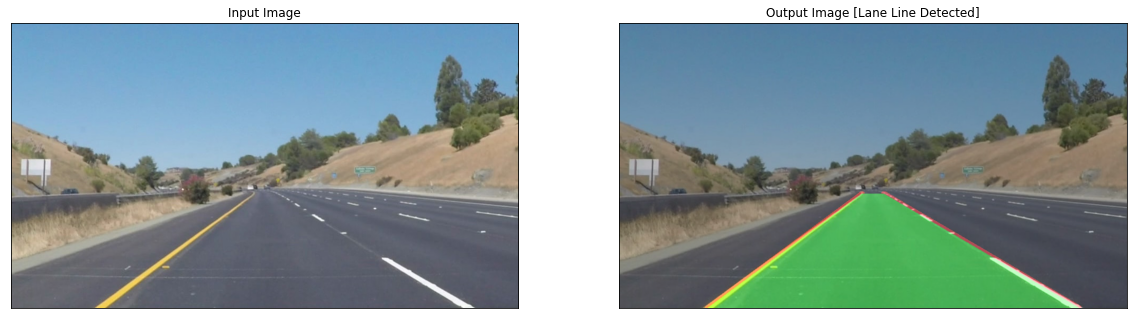

solidWhiteCurve.jpg
[ -0.80406702 692.04413032]
[ 0.56708695 36.11952623]


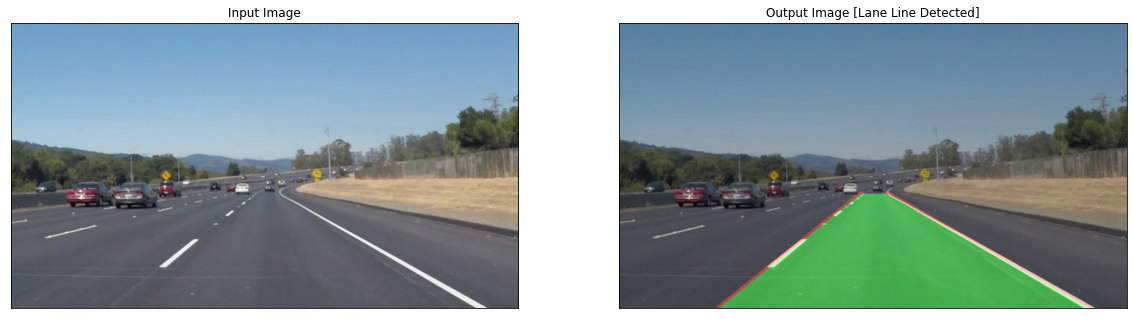

VideoSnapshot3.jpg
[ -0.71869535 666.40918813]
[ 0.55421034 42.66727373]


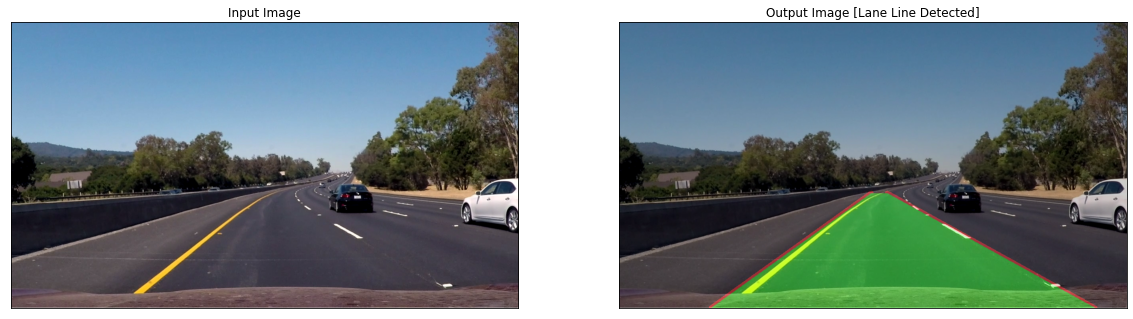

solidYellowLeft.jpg
[ -0.71699759 648.1473704 ]
[0.62881943 3.8880217 ]


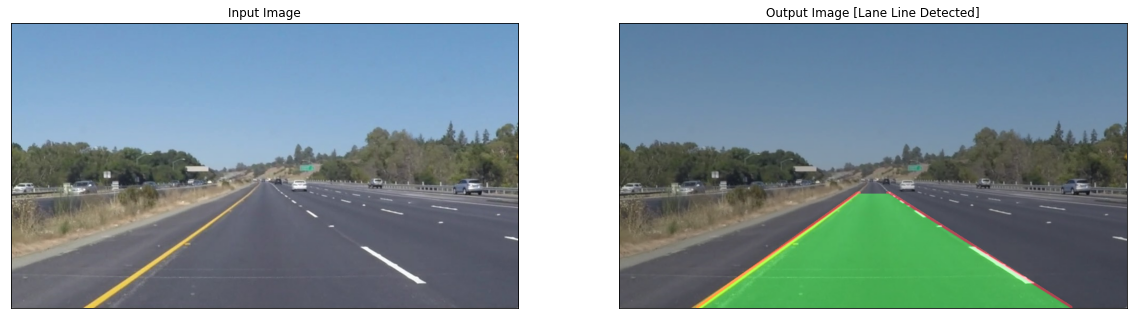

VideoSnapshot2.jpg
[-2.76170882e-01  4.78414926e+02]
[ 0.64751069 -5.09328861]


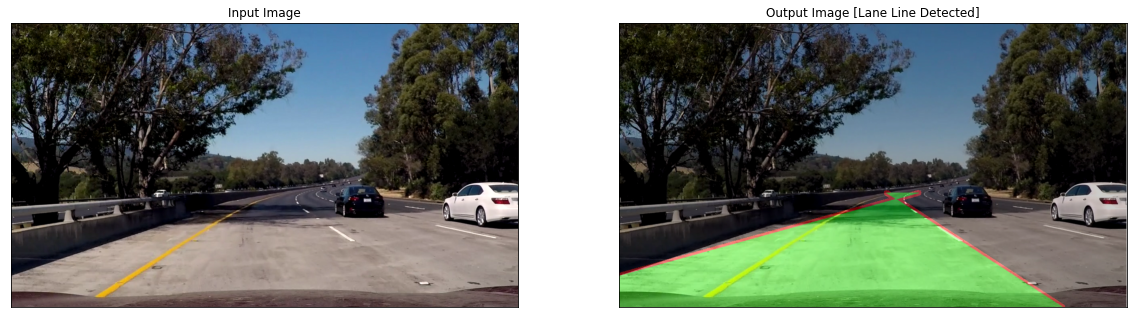

solidWhiteRight.jpg
[ -0.69411123 640.75258195]
[0.63983277 0.98475411]


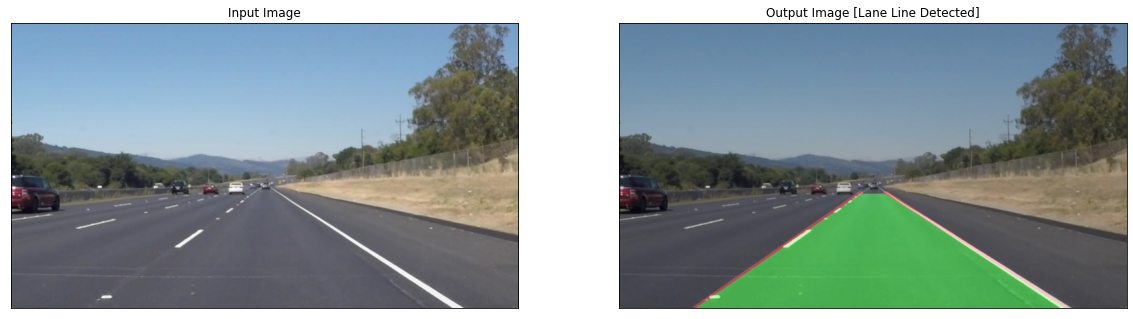

In [ ]:
import os

for image_path in os.listdir('/content/test_images'):
    fig = plt.figure(figsize=(20, 10))
    print(image_path)
    image1 = mpimg.imread(f'./test_images/{image_path}')
    ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
    plt.imshow(image1)
    ax.set_title("Input Image")
    ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
    plt.imshow(lane_finding_pipeline(image1))
    ax.set_title("Output Image [Lane Line Detected]")
    plt.show()

In [ ]:
!pip install moviepy
!pip install imageio-ffmpeg
!pip3 install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3211264/45929032 bytes (7.0%)6602752/45929032 bytes (14.4%)9928704/45929032 bytes (21.6%)13041664/45929032 bytes (28.4%)16326656/45929032 bytes (35.5%)19578880/45929032 bytes (42.6%)22839296/45929032 bytes (49.7%)26075136/45929032 bytes (56.8%)28950528/45929032 bytes (63.0%)31342592/45929032 bytes (68.2%)34603008/45929032 bytes (75.3%)37658624/45929032 bytes (82.0%)

In [ ]:
white_output = './solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("test_videos/jaipurHighway.mp4").subclip(50,60)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(lane_finding_pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[ -0.73914928 657.28470056]
[ 0.61640984 10.19427941]
[MoviePy] >>>> Building video ./solidWhiteRight.mp4
[MoviePy] Writing video ./solidWhiteRight.mp4


  3%|▎         | 6/222 [00:00<00:03, 54.49it/s]

[ -0.73914928 657.28470056]
[ 0.61640984 10.19427941]
[ -0.73860971 657.09991767]
[0.62969185 1.57225829]
[ -0.73309105 653.85774545]
[ 0.61564536 11.4614571 ]
[ -0.72545879 651.92381454]
[0.61858404 9.27716577]
[ -0.71945737 650.30629261]
[ 0.61114024 11.57615072]
[ -0.73638788 656.01178561]
[0.61864418 8.60531772]
[ -0.71752288 648.60023816]
[ 0.61415641 10.28725706]
[ -0.71415244 646.82579576]
[ 0.61195463 10.11302425]
[ -0.72153674 650.03933306]
[ 0.61421033 10.44762851]
[ -0.71986615 650.5068489 ]
[ 0.61254837 13.56959457]
[ -0.71539802 652.02054054]
[0.62207331 9.98463348]


  5%|▌         | 12/222 [00:00<00:04, 52.03it/s]

[ -0.72104301 653.34019597]
[0.6385111  1.70624447]
[ -0.71429567 649.7989276 ]
[0.63576175 2.87424126]
[ -0.71678219 649.87442469]
[0.63318513 3.24758393]
[ -0.71099143 644.24323061]
[ 0.6381517  -1.58919654]
[ -0.71276963 645.40733391]
[ 0.63848493 -2.36779753]
[ -0.71716783 644.93326406]
[ 0.64278408 -5.77685192]


 10%|█         | 23/222 [00:00<00:05, 37.29it/s]

[ -0.7132467  644.22199258]
[ 0.64139225 -4.55278999]
[ -0.70063639 641.28983429]
[ 0.64042027 -2.61053255]
[ -0.70435401 643.5787001 ]
[ 0.64516749 -2.88529484]
[ -0.71526944 650.04148798]
[ 0.64162479 -1.12890491]
[ -0.70132187 645.09764578]
[0.63893089 2.87911763]
[ -0.726983   654.68038045]
[ 0.63872084 -0.07699788]
[ -0.69676537 641.75141234]
[0.63957053 0.44215761]
[ -0.71201936 646.73595263]
[ 0.64361739 -3.06435626]


 15%|█▍        | 33/222 [00:00<00:04, 40.39it/s]

[ -0.71290712 647.81697188]
[ 0.64399966 -3.19396145]
[ -0.70104701 644.49646352]
[0.64054747 0.11412842]
[ -0.71553187 649.30379102]
[ 0.64295831 -2.63537618]
[ -0.72447917 653.2828125 ]
[0.63733911 0.03592219]
[ -0.72131848 651.35259096]
[ 0.64781535 -5.16619011]
[ -0.70641678 645.13449608]
[ 0.64204429 -3.61383362]
[ -0.71600871 647.25071794]
[ 0.64051356 -2.65831401]
[ -0.71832594 649.60064116]
[ 0.64283168 -7.05738631]
[ -0.72307293 651.45071202]
[ 0.63784475 -1.48184262]
[ -0.72685796 652.56171618]
[ 0.63840527 -0.76357818]


 19%|█▉        | 43/222 [00:01<00:04, 44.23it/s]

[ -0.73241265 655.88734226]
[0.63351303 2.18244046]
[ -0.72618613 653.19203695]
[ 0.63744476 -0.34586624]
[ -0.71813298 651.73891116]
[0.63820601 0.3113731 ]
[ -0.73469718 657.09128606]
[ 0.64119963 -1.94197116]
[ -0.73812692 657.80028368]
[0.63543351 0.02152239]
[ -0.74417926 658.68722562]
[  0.65546216 -11.96558898]
[ -0.7252901  651.03910646]
[ 0.64906209 -8.79664776]
[ -0.75247718 660.51298323]
[ 0.64248425 -5.07184721]
[ -0.73892617 654.73147582]
[ 0.65086873 -8.4356169 ]
[ -0.73088027 651.42894875]
[  0.65507715 -13.42248828]
[ -0.7403982  655.25581845]
[  0.65435398 -13.98417081]
[ -0.72185229 648.04076597]
[ 0.64473425 -6.49305682]
[ -0.7163032  645.14938629]

 22%|██▏       | 48/222 [00:01<00:05, 30.05it/s]


[  0.65586005 -13.77328671]
[ -0.72237883 647.45171184]
[ 0.64118641 -3.97053657]
[ -0.71817205 647.79909662]
[ 0.64254235 -4.96970502]
[ -0.71862125 647.3827723 ]
[ 0.64281683 -4.40608457]
[ -0.7268427 649.1562192]
[  0.65590157 -12.98083688]


 25%|██▌       | 56/222 [00:01<00:06, 23.77it/s]

[ -0.71630822 645.63213647]
[ 0.64850068 -7.77343782]
[ -0.70807278 642.04148382]
[ 0.63731716 -1.8565258 ]
[ -0.68664996 633.01343831]
[0.63227554 2.75772637]
[ -0.68143971 631.88390272]
[ 0.65258865 -8.73585827]
[ -0.6797614  631.94168909]
[0.63755143 3.58829836]


 27%|██▋       | 59/222 [00:01<00:07, 21.46it/s]

[ -0.68591404 634.87699936]
[ 0.64829064 -3.42680795]
[ -0.69003121 637.47945285]
[ 0.64674374 -2.76142955]
[ -0.68832005 635.60626151]
[0.64062283 0.29911506]
[ -0.6873026  635.39811589]
[  0.66181142 -15.44535055]


 28%|██▊       | 62/222 [00:02<00:09, 17.31it/s]

[ -0.67327823 630.02378149]
[ 0.65571998 -9.96839632]
[ -0.6943182  639.58035704]
[0.63973599 0.87337221]


 29%|██▉       | 65/222 [00:02<00:09, 16.21it/s]

[ -0.70626768 642.30190181]
[ 0.65485271 -7.54876303]
[ -0.71718368 645.83636231]
[ 0.65738608 -9.41583007]
[ -0.68669387 634.31551847]
[  0.65686677 -10.85475491]


 31%|███       | 69/222 [00:02<00:09, 16.05it/s]

[ -0.67997788 629.72306021]
[  0.65901069 -12.31883446]
[ -0.68045925 629.26405694]
[  0.65799696 -11.19040595]
[ -0.70168541 639.11743281]
[ 0.65308689 -6.17807883]
[ -0.67971067 630.36169426]
[  0.65722973 -10.26306258]


 33%|███▎      | 74/222 [00:02<00:08, 16.99it/s]

[ -0.68678407 632.28903761]
[ 0.65616631 -9.6707965 ]
[ -0.69067574 634.05434113]
[  0.65964358 -11.81218193]
[ -0.68592063 632.86407774]
[  0.66203264 -11.90135978]
[ -0.6910609  635.17593904]
[  0.65951438 -10.65960547]


 35%|███▌      | 78/222 [00:03<00:08, 17.42it/s]

[ -0.69124127 634.40048507]
[  0.66294994 -11.89837519]
[ -0.69328598 633.50106717]
[  0.66326288 -12.0385784 ]
[ -0.66020777 620.18486902]
[  0.66575696 -12.89437835]
[ -0.67017516 624.15580495]
[  0.67043679 -14.07083429]


 36%|███▌      | 80/222 [00:03<00:08, 16.74it/s]

[ -0.6671946 622.581413 ]
[  0.67278647 -16.81154272]
[ -0.65646832 619.72575043]
[  0.67473354 -17.85071002]
[ -0.69843225 634.54888967]
[  0.6733513  -16.92928871]
[ -0.69221484 633.33294132]
[  0.672464   -16.11886382]


 38%|███▊      | 84/222 [00:03<00:08, 16.38it/s]

[ -0.67140152 624.76893939]
[  0.68112635 -22.46781195]
[ -0.67318715 626.9449014 ]
[  0.67901847 -23.10154907]
[ -0.67651876 627.59213471]
[  0.67937847 -21.64575761]
[ -0.66131671 622.35053725]
[  0.66483812 -10.68098877]


 40%|████      | 89/222 [00:03<00:06, 19.37it/s]

[ -0.69849358 635.78009992]
[  0.68196009 -22.70737145]
[ -0.6633759  623.44712209]
[  0.67866077 -19.7771422 ]
[ -0.66366843 624.35784832]
[  0.6865763  -24.35890862]
[ -0.66959882 625.69756455]
[  0.68447326 -22.94275851]


 42%|████▏     | 94/222 [00:04<00:07, 17.69it/s]

[ -0.64466414 616.56476439]
[  0.68639731 -24.17604146]
[ -0.64934419 619.19623179]
[  0.68920683 -25.86975294]
[ -0.66726433 625.26659786]
[  0.6914739  -26.29558809]
[ -0.65029499 619.41248693]
[  0.69726391 -32.22346703]


 44%|████▍     | 98/222 [00:04<00:06, 17.90it/s]

[ -0.66157577 624.24854593]
[  0.68259248 -22.50495013]
[ -0.67719529 630.60493324]
[  0.70261218 -38.1027161 ]
[ -0.696409   636.65288155]
[  0.68805962 -28.55751182]
[ -0.67414105 629.67279381]
[  0.69698733 -34.32653071]


 45%|████▌     | 101/222 [00:04<00:06, 19.57it/s]

[ -0.69854333 637.21904804]
[  0.69838639 -36.2533271 ]
[ -0.65783295 620.84911847]
[  0.69271837 -33.74397985]
[ -0.65916892 622.02258061]
[  0.69597119 -34.95563548]
[ -0.67164061 628.07465035]
[  0.70298927 -37.99048036]


 48%|████▊     | 106/222 [00:04<00:06, 17.84it/s]

[ -0.64642289 619.02122609]
[  0.6947797  -31.12337774]
[ -0.63112846 617.20992159]
[  0.68936177 -28.25889588]
[ -0.67865772 633.05535973]
[  0.68775267 -28.79744177]
[ -0.66640766 627.34203298]
[  0.69007872 -31.64242784]


 49%|████▉     | 109/222 [00:04<00:05, 18.93it/s]

[ -0.69244868 637.0165009 ]
[  0.68654186 -29.10362689]
[ -0.68338527 633.80556077]
[  0.68467229 -28.96284402]
[ -0.68871885 636.80162007]
[  0.69130901 -32.55639133]
[ -0.68667173 635.84659531]
[  0.69133712 -31.21283934]


 51%|█████▏    | 114/222 [00:05<00:05, 18.15it/s]

[ -0.68325187 635.38924283]
[  0.68647163 -29.11734347]
[ -0.71329612 647.73368523]
[  0.68111685 -26.13440839]
[ -0.69899759 639.96510687]
[  0.68184046 -29.16940093]
[ -0.65930348 624.08939144]
[  0.67830404 -25.49284104]
[ -0.65530914 622.73810702]
[  0.67049638 -21.60248068]


 52%|█████▏    | 116/222 [00:05<00:09, 11.47it/s]

[ -0.69356074 636.63417713]
[  0.68342221 -31.29650075]
[ -0.65985098 624.7407461 ]
[  0.66648316 -18.58805738]
[ -0.66871077 627.710579  ]
[  0.67665981 -26.10873391]


 54%|█████▍    | 120/222 [00:05<00:08, 11.93it/s]

[ -0.68427137 632.85460199]
[  0.66085051 -14.16614575]
[ -0.67575    631.97429455]
[  0.66194067 -16.11501553]
[ -0.71202031 645.06352845]
[  0.65535335 -12.47446745]


 55%|█████▍    | 122/222 [00:06<00:09, 11.03it/s]

[ -0.67423135 633.27404822]
[ 0.64759535 -6.00301127]
[ -0.68995054 639.40233751]
[  0.65542442 -10.48848717]


 57%|█████▋    | 126/222 [00:06<00:07, 12.17it/s]

[ -0.69315217 641.13420439]
[ 0.6496152  -8.28124288]
[ -0.69256255 640.35322578]
[ 0.64251858 -3.64601595]
[ -0.69329434 641.13305284]
[0.62917128 5.04095119]
[ -0.6937244  641.25878686]
[ 0.64127132 -3.92176093]
[ -0.67511501 635.12023411]
[ 0.63878091 -2.93490045]


 59%|█████▊    | 130/222 [00:06<00:08, 10.67it/s]

[ -0.67489987 634.39418294]
[ 0.63796662 -2.52971209]
[ -0.70118575 645.66754517]
[ 0.63695639 -1.73006024]
[ -0.71063145 649.6031787 ]
[ 0.63682597 -1.78994449]


 59%|█████▉    | 132/222 [00:07<00:09,  9.30it/s]

[ -0.7121852  650.57255805]
[0.63234145 0.56155823]
[ -0.70953871 649.10543461]
[0.63189088 1.24348366]
[ -0.69990752 645.4887052 ]
[ 0.64003312 -3.74164928]


 61%|██████▏   | 136/222 [00:07<00:09,  9.42it/s]

[ -0.7092151 646.5316065]
[ 0.63763059 -3.84393341]
[ -0.71129495 645.60829132]
[ 0.63996265 -6.27852498]
[ -0.71865778 650.99004414]
[ 0.63752827 -5.6136974 ]


 62%|██████▏   | 138/222 [00:07<00:08,  9.91it/s]

[ -0.71986871 650.14497022]
[ 0.63418734 -3.55706094]
[ -0.71377287 648.67892155]
[ 0.63464414 -3.33381108]


 63%|██████▎   | 140/222 [00:07<00:08, 10.12it/s]

[ -0.71883458 652.69554929]
[ 0.6350459  -2.20650898]
[ -0.71269267 650.50043312]
[ 0.63810119 -3.50616834]
[ -0.71356092 651.69931099]
[ 0.64110689 -4.57055121]


 65%|██████▍   | 144/222 [00:08<00:08,  9.40it/s]

[ -0.7163505  653.14624973]
[0.63401287 0.83029446]
[ -0.700652   647.12451819]
[ 0.63996233 -3.62225487]
[ -0.73549017 659.15375818]
[0.63224432 1.7266002 ]


 66%|██████▌   | 146/222 [00:08<00:08,  8.61it/s]

[ -0.71847274 652.60541893]
[ 0.632495   -1.35160989]


 67%|██████▋   | 148/222 [00:08<00:07,  9.38it/s]

[ -0.73450106 659.44177374]
[ 0.63542261 -3.92525187]
[ -0.7279593  655.69566274]
[ 0.63287624 -4.70061959]
[ -0.6979812  646.06120297]
[0.61434228 8.5700804 ]


 68%|██████▊   | 150/222 [00:09<00:08,  8.98it/s]

[ -0.73286244 658.975775  ]
[0.61163596 9.48351901]
[ -0.7718513  675.96192627]
[0.6262336  0.41849883]


 68%|██████▊   | 152/222 [00:09<00:07,  9.80it/s]

[ -0.73537101 661.23317774]
[ 0.62912632 -1.23618932]
[ -0.73327736 659.97817449]
[ 0.63524161 -4.83619477]


 69%|██████▉   | 154/222 [00:09<00:08,  7.62it/s]

[ -0.73992018 661.83907251]
[ 0.63112833 -3.35137207]
[ -0.71974626 654.1796136 ]


 70%|██████▉   | 155/222 [00:09<00:08,  7.64it/s]

[ 0.62914668 -2.525944  ]
[ -0.74829329 662.78470612]
[ 0.63502247 -6.67960135]


 70%|███████   | 156/222 [00:09<00:08,  7.94it/s]

[ -0.73520387 658.59809457]
[0.61466297 5.45090033]
[ -0.73311936 658.16482905]
[0.6143568  7.52628808]


 72%|███████▏  | 159/222 [00:10<00:08,  7.66it/s]

[ -0.73520598 658.13859156]
[0.61328325 9.30440641]
[ -0.75785919 668.41165153]
[0.60858984 8.89984783]
[ -0.7630044  672.06285786]


 73%|███████▎  | 161/222 [00:10<00:07,  8.63it/s]

[0.60969344 7.48537193]
[ -0.74463438 667.55071225]
[0.61367317 5.07356177]


 74%|███████▍  | 165/222 [00:10<00:05,  9.68it/s]

[ -0.73922991 664.71112838]
[ 0.60110693 12.14199798]
[ -0.77729205 681.27273831]
[ 0.5904337  18.85439297]
[ -0.75226643 671.75729136]
[ 0.59138648 20.38432991]
[ -0.76281045 674.64562732]
[ 0.58967469 21.77298324]


 75%|███████▌  | 167/222 [00:11<00:07,  7.41it/s]

[ -0.75500898 672.62559976]
[ 0.58653244 23.9217864 ]
[ -0.7690236  678.66246612]
[ 0.58694003 23.90943557]
[ -0.75363769 673.04365124]
[ 0.58962375 22.89076166]


 77%|███████▋  | 170/222 [00:11<00:07,  7.41it/s]

[ -0.78202566 683.02818462]
[ 0.59089142 21.72391867]
[ -0.78595661 683.74525287]
[ 0.58614787 24.05474745]
[ -0.77648133 681.47983312]
[ 0.58311142 26.1044635 ]


 78%|███████▊  | 174/222 [00:12<00:06,  7.36it/s]

[ -0.81344284 695.81264624]
[ 0.58594639 24.91456443]
[ -0.78907651 687.46269083]
[ 0.58817778 22.81611521]
[ -0.81789929 698.45823318]
[ 0.58959685 21.32885155]


 80%|███████▉  | 177/222 [00:12<00:05,  8.42it/s]

[ -0.79476703 689.04765256]
[ 0.5890027 22.7249388]
[ -0.80378781 693.43432905]
[ 0.58503855 25.38015775]
[ -0.79526029 689.60328982]
[ 0.59235356 21.11577707]
[ -0.79298082 688.22299693]
[ 0.58992126 21.55381245]


 82%|████████▏ | 181/222 [00:13<00:05,  7.56it/s]

[ -0.79625425 689.58429674]
[ 0.5861453 23.8838513]
[ -0.8099349  694.21318325]
[ 0.58751526 21.30155928]
[ -0.81055544 694.39437063]
[ 0.58452871 22.22844482]


 82%|████████▏ | 183/222 [00:13<00:05,  7.24it/s]

[ -0.81513197 695.86310697]
[ 0.58871836 20.57912149]
[ -0.7992771  689.50456912]
[ 0.59244974 18.98367404]
[ -0.82726158 699.77633433]
[0.60824762 7.01047822]


 83%|████████▎ | 185/222 [00:13<00:04,  8.08it/s]

[ -0.78927391 686.10908004]
[ 0.60039691 13.22116547]
[ -0.80300523 690.75253348]
[ 0.58760216 22.12404869]


 85%|████████▍ | 188/222 [00:14<00:04,  7.24it/s]

[ -0.81027618 692.86160928]
[ 0.58856037 20.03304848]
[ -0.80968675 690.72379677]
[ 0.58307299 19.93891053]


 86%|████████▌ | 190/222 [00:14<00:04,  6.87it/s]

[ -0.81187854 689.14324251]
[ 0.58512461 16.38729675]
[ -0.79988282 687.05058012]
[ 0.56604947 31.4925777 ]


 86%|████████▋ | 192/222 [00:14<00:04,  6.02it/s]

[ -0.82650415 699.7732387 ]
[ 0.56670287 31.12544534]
[ -0.78834283 685.71020839]
[ 0.5674625 32.9385676]


 87%|████████▋ | 194/222 [00:15<00:03,  7.17it/s]

[ -0.79021444 688.49550191]
[ 0.58628597 22.75690695]
[ -0.77615974 682.14531843]
[ 0.58777034 22.44171558]


 89%|████████▊ | 197/222 [00:15<00:03,  7.73it/s]

[ -0.78771449 688.15667481]
[ 0.58823648 22.96508239]
[ -0.78183653 683.17782223]
[ 0.59040095 21.40753078]
[ -0.81649729 696.37519772]
[ 0.58896802 21.83155527]


 90%|████████▉ | 199/222 [00:16<00:04,  5.73it/s]

[ -0.75162942 669.8386578 ]
[ 0.58730134 21.99796493]


 90%|█████████ | 200/222 [00:16<00:03,  6.41it/s]

[ -0.81498027 696.05088426]
[ 0.59178411 19.99953871]
[ -0.80449732 690.38029543]
[ 0.58497722 22.51967999]
[ -0.8046023  690.05891342]
[ 0.58658184 20.5276301 ]


 91%|█████████▏| 203/222 [00:16<00:02,  7.14it/s]

[ -0.8105946  692.79431488]
[ 0.58493292 22.1982663 ]
[ -0.78289972 682.93175968]
[ 0.58576294 21.1505944 ]
[ -0.83727132 703.85994848]
[ 0.57757405 25.72949273]


 93%|█████████▎| 206/222 [00:16<00:02,  7.38it/s]

[ -0.77274768 677.95336484]
[ 0.57107155 31.03753468]
[ -0.77603163 679.31649825]
[ 0.56645517 32.7262453 ]


 94%|█████████▎| 208/222 [00:17<00:01,  7.47it/s]

[ -0.76094308 672.95693726]
[ 0.57370233 27.79346163]
[ -0.81642088 694.21471479]
[ 0.56822611 30.8515827 ]
[ -0.76679785 673.8668372 ]
[ 0.56707731 32.01817692]


 95%|█████████▌| 212/222 [00:17<00:01,  7.99it/s]

[ -0.84228047 705.23253735]
[ 0.56208321 34.2570235 ]
[ -0.8303024  699.57927846]
[ 0.56074376 36.32973034]
[ -0.80334416 689.67711368]
[ 0.56827116 32.17360071]


 96%|█████████▋| 214/222 [00:17<00:01,  7.57it/s]

[ -0.79288656 686.42745638]
[ 0.56555585 35.59735734]
[ -0.79199855 687.80276776]
[ 0.5689843  33.97648773]
[ -0.81627511 696.34237825]
[ 0.56794914 35.53564168]


 98%|█████████▊| 217/222 [00:18<00:00,  8.78it/s]

[ -0.79490474 688.35520758]
[ 0.5641464 38.1327115]
[ -0.79363696 686.48838656]
[ 0.56860284 35.49381676]


 99%|█████████▊| 219/222 [00:18<00:00,  7.59it/s]

[ -0.78606006 683.45399826]
[ 0.5651309  36.69137569]
[ -0.76924692 678.4330072 ]
[ 0.58874027 22.62988927]


100%|█████████▉| 221/222 [00:18<00:00, 11.80it/s]


[ -0.7900621  683.96321151]
[ 0.56632421 35.71238391]
[MoviePy] Done.
[MoviePy] >>>> Video ready: ./solidWhiteRight.mp4 

CPU times: user 4.3 s, sys: 568 ms, total: 4.87 s
Wall time: 21.5 s


In [ ]:
HTML("""
<video width="960" height="500" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [ ]:
yellow_output = './solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(lane_finding_pipeline)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[ -0.61795754 608.54755696]
[  0.67562167 -22.22603193]
[MoviePy] >>>> Building video ./solidYellowLeft.mp4
[MoviePy] Writing video ./solidYellowLeft.mp4


  1%|          | 5/682 [00:00<00:15, 42.86it/s]

[ -0.61795754 608.54755696]
[  0.67562167 -22.22603193]
[ -0.62493723 612.12155601]
[  0.67752678 -23.27236724]
[ -0.62883406 613.29183261]
[  0.68274256 -26.9950547 ]
[ -0.63091365 615.60266604]
[  0.66808859 -17.90914102]
[ -0.63622038 617.38448303]
[  0.6606942  -13.94077923]
[ -0.63228458 618.00754593]
[  0.6928255  -33.57916647]
[ -0.64388761 622.85209269]
[  0.68318006 -28.45716159]
[ -0.67463634 634.22014828]
[  0.662969   -17.54011261]
[ -0.68442312 635.20824565]
[  0.66851558 -21.67426066]


  2%|▏         | 16/682 [00:00<00:13, 48.49it/s]

[ -0.67454399 631.91159913]
[  0.66078216 -17.90076389]
[ -0.66263357 628.56247612]
[  0.65458535 -13.87904146]
[ -0.68081862 635.39073501]
[  0.65230879 -12.88130444]
[ -0.67678841 632.92721264]
[ 0.63920562 -3.73678552]
[ -0.6890114  641.11936936]
[  0.66506178 -19.47124207]
[ -0.67515875 635.21734867]
[ 0.63671584 -3.52621329]
[ -0.68646826 638.1549427 ]
[ 0.63426792 -2.06389722]
[ -0.68661677 638.40042588]
[ 0.63715813 -3.65812349]
[ -0.72788233 656.33722435]
[  0.6590085  -16.58615997]
[ -0.73544971 658.96675094]
[  0.64828148 -10.31352018]
[ -0.75155183 665.51976298]
[ 0.63396484 -2.43589026]


  4%|▍         | 27/682 [00:00<00:12, 50.86it/s]

[ -0.68885484 637.92569742]
[0.63032451 0.11596749]
[ -0.69292556 639.37363439]
[ 0.64084586 -7.28094496]
[ -0.72716306 653.44510781]
[ 0.63670397 -4.55277857]
[ -0.68865741 637.44446622]
[ 0.63812343 -5.18830432]
[ -0.72858252 655.15709597]
[ 0.63656201 -4.51525387]
[ -0.78490611 680.74813023]
[ 0.63732264 -3.16153452]
[ -0.73752906 657.67955545]
[ 0.61171574 11.73564688]
[ -0.72784526 654.46561577]
[0.61512893 8.64139007]
[ -0.72915307 654.02649795]
[0.60815126 9.96683276]
[ -0.72045001 650.86218744]
[ 0.60554827 10.81634841]
[ -0.72956894 654.6737612 ]


  5%|▍         | 33/682 [00:00<00:13, 48.20it/s]

[  0.65707828 -20.14055178]
[ -0.72337169 651.91553691]
[  0.6534459  -17.97215804]
[ -0.72484376 652.54589864]
[ 0.50999116 86.498876  ]
[ -0.80356012 683.49474738]
[0.61380253 5.56510105]
[ -0.78577236 677.04162373]
[ 0.62725193 -2.25635911]
[ -0.73892842 656.04741937]
[  0.63947832 -10.42901676]
[ -0.73900512 655.84191402]
[ 0.62798317 -4.92122083]


  6%|▌         | 38/682 [00:00<00:13, 47.48it/s]

[ -0.76133639 663.7628387 ]
[0.60868402 8.11604783]
[ -0.73680675 653.42548866]
[0.6142905  4.21960314]
[ -0.73259868 652.14082606]
[0.60950904 6.16029856]


  6%|▋         | 43/682 [00:00<00:13, 46.10it/s]

[ -0.74684233 657.13974982]
[ 0.59287699 17.91277762]
[ -0.73676276 653.44025191]
[0.61187443 5.69089153]
[ -0.7356157  652.78598858]
[0.61912268 1.39432318]
[ -0.73150006 651.40888827]
[ 0.62487631 -1.12120071]
[ -0.73688074 654.74360584]
[0.61427706 5.50454388]
[ -0.73685408 652.37992404]
[0.62457481 0.01506141]
[ -0.72958472 651.2890737 ]
[0.61273356 8.71994553]


  7%|▋         | 48/682 [00:01<00:18, 34.32it/s]

[ -0.72465462 648.8987076 ]
[0.62479915 1.2936027 ]
[ -0.73767189 653.54686128]
[ 0.60565301 11.1402054 ]
[ -0.7420372  654.73365055]
[0.61092834 7.93063583]
[ -0.74642395 656.63607641]
[0.61298077 7.16201923]
[ -0.73595989 652.6951789 ]
[ 0.60773743 10.00395522]


  8%|▊         | 52/682 [00:01<00:22, 27.93it/s]

[ -0.72587391 648.82405672]
[0.61188644 8.4801403 ]
[ -0.72948804 651.12468201]
[ 0.6027532  13.48349312]
[ -0.72431621 648.83012379]
[ 0.60782751 13.03477354]
[ -0.73085865 651.75717164]
[  0.65887393 -16.29808242]


  8%|▊         | 56/682 [00:01<00:26, 23.92it/s]

[ -0.72900523 650.25088378]
[ 0.63134736 -2.83548039]
[ -0.73192293 652.52905661]
[ 0.63155237 -1.47139819]


  9%|▊         | 59/682 [00:01<00:27, 22.38it/s]

[ -0.73735411 653.67812358]
[0.63009632 0.07120267]
[ -0.72124248 648.79102325]
[ 0.61056028 12.56438861]
[ -0.72056905 648.53563802]
[ 0.63402641 -1.39519732]
[ -0.71318645 642.93523914]
[0.6167404  8.66549901]


  9%|▉         | 62/682 [00:01<00:29, 20.78it/s]

[ -0.71698147 645.28484038]
[0.6284727  1.68153727]
[ -0.71444365 643.81268019]
[ 0.61111675 11.59361899]


 10%|▉         | 65/682 [00:02<00:30, 20.38it/s]

[ -0.71190921 642.71544689]
[ 0.60956586 12.08128696]
[ -0.71213776 643.42816953]
[ 0.61086232 11.73810247]


 10%|▉         | 68/682 [00:02<00:30, 19.93it/s]

[ -0.7113992  643.52497374]
[ 0.61030553 13.44801843]
[ -0.71153286 643.7236663 ]
[ 0.61306101 11.4350861 ]
[ -0.70030143 640.46797413]
[ 0.64270805 -5.22839855]
[ -0.71719572 648.16049062]
[ 0.61776616 10.12685307]


 10%|█         | 71/682 [00:02<00:33, 18.27it/s]

[ -0.71941202 646.60706199]
[ 0.6372805  -1.83084422]
[ -0.72202844 649.94822447]
[ 0.61128465 14.62188203]
[ -0.69830902 639.86097362]
[0.62177535 9.20959173]
[ -0.71484082 644.29387293]
[ 0.64258112 -4.96027743]


 11%|█         | 74/682 [00:02<00:33, 18.11it/s]

[ -0.71693725 648.36152798]
[0.62580315 5.44977331]
[ -0.7158323  647.33518573]
[0.63369783 0.70290277]
[ -0.71107418 644.98254591]
[ 0.61288141 16.04177765]


 11%|█▏        | 77/682 [00:02<00:32, 18.54it/s]

[ -0.71105765 644.38765345]
[ 0.61862773 11.5836552 ]


 12%|█▏        | 79/682 [00:02<00:33, 17.99it/s]

[ -0.71281324 643.93575272]
[ 0.64099869 -5.12631526]
[ -0.71445073 645.53165879]
[0.6325207  1.74036688]
[ -0.71334404 645.33248559]
[  0.66676181 -18.02040398]


 12%|█▏        | 81/682 [00:03<00:36, 16.58it/s]

[ -0.71351343 644.82537056]
[ 0.64206781 -5.00538423]


 12%|█▏        | 84/682 [00:03<00:32, 18.31it/s]

[ -0.71259905 644.76935479]
[  0.65600519 -12.03132687]
[ -0.72406683 645.90487714]
[ 0.6403161  -3.81915409]
[ -0.71305302 643.50618268]
[  0.65778741 -12.5844193 ]
[ -0.69607779 636.98366899]
[ 0.6495715 -8.1950736]


 13%|█▎        | 88/682 [00:03<00:32, 18.04it/s]

[ -0.68829851 634.67142199]
[  0.65740035 -13.14877199]
[ -0.70182154 639.41172787]
[ 0.63779574 -0.65353955]
[ -0.70144339 639.63101278]
[ 0.64241107 -4.2495343 ]
[ -0.68612644 634.45844363]
[ 0.63643896 -0.06420314]


 14%|█▍        | 94/682 [00:03<00:32, 18.21it/s]

[ -0.69230179 637.91199713]
[ 0.63724343 -0.18848573]
[ -0.6886027  637.41106648]
[0.63531815 3.98105772]
[ -0.69135046 640.01525317]
[ 0.62739738 10.10698492]
[ -0.69143658 641.06053307]
[ 0.657179   -9.33839342]


 14%|█▍        | 96/682 [00:03<00:34, 17.10it/s]

[ -0.6917193  641.16229169]
[0.64180857 0.82867861]
[ -0.69255733 641.86068982]
[ 0.64754903 -3.9930065 ]
[ -0.69329644 641.45525796]
[  0.67330309 -18.31853678]
[ -0.71882118 650.81912914]
[0.63713536 2.04968864]


 15%|█▍        | 102/682 [00:04<00:32, 17.91it/s]

[ -0.69080049 639.41061375]
[0.63634059 1.55556272]
[ -0.69201102 640.28540048]
[ 0.64855715 -5.93605104]
[ -0.68982199 639.03032807]
[0.63986273 0.70331073]
[ -0.69043742 639.54070647]
[0.63463812 1.52592254]


 15%|█▌        | 104/682 [00:04<00:32, 18.05it/s]

[ -0.69029234 639.97285154]
[0.63865813 0.16121823]
[ -0.68955087 637.4358184 ]
[ 0.64587131 -4.300132  ]
[ -0.68452924 634.98330068]
[0.63262443 5.14087796]
[ -0.68594523 635.76968921]
[0.62054316 8.90932557]


 16%|█▌        | 109/682 [00:04<00:30, 18.70it/s]

[ -0.69551499 640.01957573]
[ 0.64391234 -4.16662598]
[ -0.69375994 639.64004001]
[ 0.64794905 -5.12792997]
[ -0.70065775 642.26797879]
[0.62997376 5.11384867]
[ -0.69009305 639.23349291]
[0.63888414 0.72877337]


 16%|█▋        | 111/682 [00:04<00:32, 17.44it/s]

[ -0.68767022 639.46725512]
[0.63807249 0.76834638]
[ -0.68537469 638.38127328]
[0.634346   2.84919982]
[ -0.697683  643.7982229]
[ 0.64226017 -2.66534016]
[ -0.70113306 644.43746883]
[0.63674395 0.33205948]


 17%|█▋        | 118/682 [00:05<00:32, 17.56it/s]

[ -0.69866699 643.51230498]
[0.63267602 3.15899827]
[ -0.68880236 638.88499068]
[0.62993209 5.01003101]
[ -0.6929506  640.80306696]
[0.62221472 9.75141016]
[ -0.67715624 635.76017532]
[ 0.6380015  -0.93857954]


 18%|█▊        | 121/682 [00:05<00:29, 18.94it/s]

[ -0.67583253 635.64791755]
[0.63167071 1.12954963]
[ -0.70341403 644.11190674]
[ 0.64270869 -3.82986874]
[ -0.69873519 642.53766143]
[ 0.63960829 -2.86146128]
[ -0.70764008 645.16453034]
[ 0.64817606 -7.13142446]


 18%|█▊        | 126/682 [00:05<00:31, 17.67it/s]

[ -0.70884611 646.44385647]
[0.62974928 4.23585241]
[ -0.70631724 645.45044588]
[ 0.63814685 -0.07528718]
[ -0.70804457 645.62660301]
[ 0.638738   -2.37764682]
[ -0.71153825 648.55100002]
[0.63484277 0.62732876]


 19%|█▉        | 128/682 [00:05<00:32, 17.22it/s]

[ -0.70900785 646.34255498]
[0.62844019 3.6170942 ]
[ -0.69467158 642.56115185]
[ 0.61651797 14.01945198]
[ -0.70247733 646.17422632]
[ 0.60455879 21.22091165]
[ -0.70292371 646.30661352]
[ 0.64161504 -2.81007141]


 19%|█▉        | 131/682 [00:05<00:30, 17.88it/s]

[ -0.69706969 644.1383763 ]
[0.62903021 5.26656829]
[ -0.69357558 642.20780537]
[ 0.64825867 -5.82391856]
[ -0.69349333 641.75438065]
[ 0.63843186 -1.12862658]
[ -0.70114648 645.85307172]
[0.62548297 5.68970873]


 20%|██        | 137/682 [00:06<00:27, 19.49it/s]

[ -0.70827708 649.0877779 ]
[ 0.64329489 -3.26719551]
[ -0.69834763 645.06137587]
[ 0.63690253 -0.1616438 ]
[ -0.6980758  645.01994631]
[0.62555516 7.16907117]
[ -0.70830994 648.25046668]
[ 0.64837952 -7.2648984 ]


 21%|██        | 142/682 [00:06<00:30, 17.75it/s]

[ -0.70209054 646.32465779]
[ 0.63848301 -2.12514389]
[ -0.70055645 645.00199643]
[0.62956946 2.90226184]
[ -0.69713104 643.44160526]
[ 0.61613431 12.17892484]
[ -0.70078872 644.45204795]
[ 0.61827088 12.71898058]


 21%|██        | 144/682 [00:06<00:30, 17.66it/s]

[ -0.70905597 646.67547955]
[0.63648839 1.35781568]
[ -0.7099193  646.89946308]
[ 0.52051988 95.96874526]
[ -0.70786474 646.89419094]
[0.63013698 4.73690203]
[ -0.69062492 640.806321  ]
[ 0.63895099 -0.96846833]


 22%|██▏       | 149/682 [00:06<00:29, 18.05it/s]

[ -0.69761188 643.60621716]
[ 0.61792561 11.43678275]
[ -0.70589456 644.98818732]
[0.62455185 7.85909701]
[ -0.69769783 643.72774282]
[ 0.60609624 18.86624699]
[ -0.68212752 637.48980759]
[0.63578161 0.04809949]


 22%|██▏       | 151/682 [00:06<00:31, 16.90it/s]

[ -0.70755677 649.11127707]
[ 0.60858144 16.71565472]
[ -0.69664178 644.35950893]
[ 0.6124965  16.07624989]
[ -0.70157264 647.18463484]
[ 0.61747122 10.17311257]
[ -0.70267415 647.88836461]
[ 0.60114093 21.24345029]


 23%|██▎       | 156/682 [00:07<00:30, 17.15it/s]

[ -0.7055     650.39333397]
[ 0.61827586 11.47801362]
[ -0.69383494 649.1026913 ]
[ 0.58328771 33.64094868]
[ -0.69225941 647.79593992]
[ 0.59767178 24.40771616]
[ -0.70864049 654.52086318]
[ 0.58775253 29.43219697]


 24%|██▎       | 161/682 [00:07<00:27, 18.83it/s]

[ -0.71770296 656.60099225]
[ 0.60611449 20.20733631]
[ -0.70049547 652.32394816]
[ 0.58769381 31.64130149]
[ -0.6965826  650.73341382]
[ 0.60613542 19.19490247]
[ -0.72057421 661.08585381]
[ 0.61240234 15.00184901]


 24%|██▍       | 166/682 [00:07<00:29, 17.40it/s]

[ -0.69792764 651.26901264]
[ 0.58477582 31.20005098]
[ -0.71130108 655.64208355]
[ 0.58875619 28.16607076]
[ -0.70995618 652.59414774]
[ 0.59095924 27.34376938]
[ -0.69435551 650.13995616]
[ 0.58380614 30.46850399]


 25%|██▍       | 168/682 [00:07<00:29, 17.16it/s]

[ -0.70950095 654.25199388]
[ 0.586864   28.47356457]
[ -0.71447316 658.00297611]
[ 0.58671108 28.15011237]
[ -0.71607765 659.19841737]
[ 0.58525245 28.99558952]
[ -0.71992236 661.15200345]
[ 0.58565894 27.47241401]


 25%|██▌       | 172/682 [00:08<00:31, 16.21it/s]

[ -0.71691494 659.69407388]
[ 0.58840189 25.22758317]
[ -0.73264444 665.83481423]
[ 0.59127401 23.98566429]
[ -0.72718553 662.58299359]
[ 0.5875235  25.85224727]
[ -0.73383494 665.7507978 ]
[ 0.58259651 27.36089887]
[ -0.74025807 667.38540016]
[ 0.58570433 24.42107331]


 26%|██▌       | 178/682 [00:08<00:29, 17.18it/s]

[ -0.74136488 669.26040841]
[ 0.5861991  24.16018339]
[ -0.74879562 672.90462035]
[ 0.58144752 27.21809948]
[ -0.766912   677.42241362]
[ 0.57314803 31.61340608]
[ -0.74740239 671.7602188 ]
[ 0.5792986  27.24342373]


 27%|██▋       | 182/682 [00:08<00:28, 17.60it/s]

[ -0.76143197 678.69882212]
[ 0.56866603 35.36659695]
[ -0.74586508 671.46155763]
[ 0.56234992 40.11838607]
[ -0.76517293 677.17479487]
[ 0.55812157 42.13790051]
[ -0.75008759 672.29111072]
[ 0.5642671  38.54995987]


 27%|██▋       | 186/682 [00:08<00:27, 17.79it/s]

[ -0.74725198 671.17996305]
[ 0.56377096 39.87538847]
[ -0.7654008  678.67153694]
[ 0.55653812 44.26577136]
[ -0.75018737 672.67903522]
[ 0.55790379 43.58051418]
[ -0.76218352 676.90137127]
[ 0.54938635 49.95759443]


 28%|██▊       | 188/682 [00:09<00:30, 16.43it/s]

[ -0.76342551 676.55832538]
[ 0.55262622 48.15981628]
[ -0.7688874  679.86715387]
[ 0.56584901 38.84735566]
[ -0.76801295 681.34949355]
[ 0.55817083 44.49586716]
[ -0.77060973 680.92314482]
[ 0.54601552 54.24459182]


 28%|██▊       | 193/682 [00:09<00:28, 17.15it/s]

[ -0.77473231 683.31704199]
[ 0.54505574 53.29608228]
[ -0.78506996 684.43055927]
[ 0.57011819 36.82103738]
[ -0.79105722 686.70553519]
[ 0.55778917 44.90763579]


 29%|██▊       | 195/682 [00:09<00:34, 14.01it/s]

[ -0.78454423 683.16719309]
[ 0.56334458 41.33396801]
[ -0.76980029 679.05388086]
[ 0.56341185 41.70495169]
[ -0.78414587 682.26548621]
[ 0.56109058 42.79254125]


 29%|██▉       | 197/682 [00:09<00:40, 12.10it/s]

[ -0.78204907 681.37778416]
[ 0.55841846 46.26087332]
[ -0.76698828 676.9158688 ]
[ 0.56736122 40.31028948]


 30%|██▉       | 202/682 [00:10<00:38, 12.39it/s]

[ -0.7675055 676.9423135]
[ 0.56030184 45.40787267]
[ -0.7654516  673.97334809]
[ 0.56669705 41.82732041]
[ -0.76419974 672.96358742]
[ 0.55039792 52.00777728]
[ -0.76544333 673.95719224]
[ 0.57200981 37.93798144]


 30%|██▉       | 204/682 [00:10<00:35, 13.33it/s]

[ -0.74639282 667.33757804]
[ 0.57359026 38.28743321]
[ -0.75156092 669.55005937]
[ 0.58135212 33.91383377]


 30%|███       | 206/682 [00:10<00:50,  9.45it/s]

[ -0.75476483 671.06494936]
[ 0.56285982 45.53886157]
[ -0.75049112 668.5888536 ]
[ 0.55938239 48.83527388]


 30%|███       | 208/682 [00:10<00:43, 10.83it/s]

[ -0.76234337 673.89782706]
[ 0.55297071 51.70454928]
[ -0.74369115 667.28696052]
[ 0.55630578 49.72687614]
[ -0.73990802 664.39414855]
[ 0.5762817  37.74066503]


 31%|███       | 212/682 [00:11<00:47,  9.82it/s]

[ -0.74095347 664.52596969]
[ 0.57963088 36.54833706]
[ -0.73435999 660.15586199]
[ 0.58217926 34.97690397]
[ -0.73535539 661.1629811 ]
[ 0.58593888 32.8065157 ]


 31%|███▏      | 214/682 [00:11<00:46, 10.17it/s]

[ -0.722807   657.36000855]
[ 0.59525073 28.09586897]
[ -0.72251659 656.69012983]
[ 0.58520974 33.72044944]


 32%|███▏      | 216/682 [00:11<00:57,  8.12it/s]

[ -0.72123215 654.77604055]
[ 0.58588192 33.49502   ]
[ -0.7249179  656.47535119]
[ 0.58446596 35.52813332]
[ -0.72534166 656.61487005]
[ 0.59059739 31.94334645]


 33%|███▎      | 222/682 [00:12<00:38, 12.09it/s]

[ -0.73064414 658.66758531]
[ 0.58825417 32.00417202]
[ -0.72992972 658.99454122]
[ 0.57614166 40.07874728]
[ -0.72881251 660.39832651]
[ 0.57733976 38.25784928]
[ -0.72040915 654.68191828]
[ 0.59594874 26.68644999]


 33%|███▎      | 226/682 [00:12<00:31, 14.61it/s]

[ -0.66523235 652.62027945]
[0.62653355 8.77723712]
[ -0.72809482 657.93366534]
[ 0.59033375 29.54546301]
[ -0.73199873 659.28531652]
[ 0.60590623 21.27912965]
[ -0.7260201  657.27275989]
[ 0.58670741 33.48195197]


 33%|███▎      | 228/682 [00:12<00:31, 14.50it/s]

[ -0.72757034 657.13412156]
[ 0.60713068 17.58176885]
[ -0.72678036 656.41869192]
[ 0.58559907 34.49282454]
[ -0.72672106 655.98258571]
[ 0.58427494 32.95597433]
[ -0.73731894 660.49030152]
[ 0.60191752 22.50864338]


 34%|███▍      | 233/682 [00:12<00:26, 16.88it/s]

[ -0.71932017 653.39764606]
[ 0.61426654 13.73743278]
[ -0.70955121 647.86972383]
[ 0.61106968 15.84593831]
[ -0.70852933 647.28518385]
[0.62277662 9.66536487]
[ -0.71387008 648.57325186]
[ 0.60736257 18.51913281]


 34%|███▍      | 235/682 [00:13<00:26, 16.76it/s]

[ -0.70626441 647.04015447]
[ 0.60580594 20.70771613]
[ -0.69618755 643.77411446]
[ 0.61195013 14.60939786]
[ -0.71062127 647.16344395]
[ 0.61453762 11.58998254]
[ -0.71006561 647.04468779]
[ 0.61225628 12.51062618]


 35%|███▌      | 241/682 [00:13<00:24, 18.23it/s]

[ -0.71354365 646.31102853]
[ 0.6060198  16.56941416]
[ -0.706109   643.97655312]
[0.6207259  7.19666033]
[ -0.70526023 644.48754592]
[ 0.60313124 18.62376974]
[ -0.70160592 645.47012593]
[ 0.58185889 33.00903457]


 36%|███▌      | 246/682 [00:13<00:24, 17.65it/s]

[ -0.70864203 646.84734183]
[ 0.60112298 20.06425419]
[ -0.70932326 647.93374729]
[ 0.57646954 36.82303135]
[ -0.70144827 646.41280838]
[ 0.58295158 32.62116122]
[ -0.6907773  642.63110003]
[ 0.57295505 40.85989801]


 37%|███▋      | 249/682 [00:13<00:22, 19.07it/s]

[ -0.71939175 654.61092915]
[ 0.59347271 28.45785889]
[ -0.70786907 649.08164634]
[ 0.61030193 18.1743226 ]
[ -0.69726595 644.20887879]
[ 0.59919683 24.34174402]
[ -0.71815684 652.58051636]
[ 0.61101688 17.30950656]


 37%|███▋      | 254/682 [00:14<00:24, 17.41it/s]

[ -0.69991649 645.00167216]
[ 0.61081768 17.7260392 ]
[ -0.71273831 651.37006505]
[ 0.60047554 25.2831305 ]
[ -0.70104908 646.25643853]
[ 0.6052842  21.75690262]
[ -0.70033016 647.05762175]
[ 0.61062856 19.13875313]


 38%|███▊      | 256/682 [00:14<00:23, 17.77it/s]

[ -0.71512932 652.22841619]
[0.62435528 8.68840028]
[ -0.71755639 653.87301547]
[ 0.61205675 16.49863409]
[ -0.72209539 654.18779124]
[ 0.59166997 29.82514731]
[ -0.72360815 654.92738264]
[ 0.58499204 32.62917994]


 38%|███▊      | 262/682 [00:14<00:23, 17.56it/s]

[ -0.72478993 655.2212147 ]
[ 0.6062395  20.64029412]
[ -0.72286145 653.81484149]
[ 0.61081499 16.91960082]
[ -0.73274208 658.67965912]
[ 0.61224664 16.29586609]
[ -0.7340579  660.32766436]
[ 0.61703093 15.03021503]


 39%|███▉      | 266/682 [00:14<00:23, 17.76it/s]

[ -0.73944732 662.61924814]
[ 0.62327752 10.00218809]
[ -0.73361997 659.02630956]
[ 0.61093057 16.54018412]
[ -0.71995776 654.32243672]
[ 0.60870215 16.13066282]
[ -0.71413392 650.6274647 ]
[ 0.59125011 27.78763383]


 40%|███▉      | 270/682 [00:15<00:22, 17.93it/s]

[ -0.71497212 652.06132248]
[ 0.61099795 14.97855705]
[ -0.71546485 651.97262813]
[ 0.59642964 24.52485681]
[ -0.71142572 651.10908987]
[ 0.59129637 28.18130127]
[ -0.71716237 653.31428731]
[ 0.59985967 22.36011918]


 40%|████      | 274/682 [00:15<00:23, 17.54it/s]

[ -0.7105907  651.23554335]
[ 0.58788014 28.52772809]
[ -0.71826432 654.13964554]
[ 0.57498171 35.30588862]
[ -0.71480173 654.19382918]
[ 0.5815995  32.57297708]
[ -0.72026624 657.96558111]
[ 0.58270933 31.58427593]


 41%|████      | 278/682 [00:15<00:22, 17.64it/s]

[ -0.7170757  656.15352854]
[ 0.5857846  30.72924559]
[ -0.71481638 653.16013495]
[ 0.57616741 34.55682562]
[ -0.71524036 653.54002818]
[ 0.56946051 39.27974847]
[ -0.71195193 652.14864188]
[ 0.58893127 26.79924212]


 41%|████▏     | 282/682 [00:15<00:22, 17.54it/s]

[ -0.71850146 655.13567771]
[ 0.59038227 27.906183  ]
[ -0.71753015 656.28101534]
[ 0.61160393 14.25845918]
[ -0.71566018 656.44900159]
[ 0.55581157 49.15831107]
[ -0.71686716 656.35727572]
[ 0.58182101 33.81866804]


 42%|████▏     | 286/682 [00:15<00:22, 17.49it/s]

[ -0.73066605 662.58884545]
[ 0.56039713 48.58552765]
[ -0.73571763 662.61513505]
[ 0.57676728 39.46897198]
[ -0.72208129 655.83337039]
[ 0.56134392 47.1934361 ]
[ -0.72584356 656.80925207]
[ 0.56620263 45.12415397]


 42%|████▏     | 289/682 [00:16<00:23, 16.78it/s]

[ -0.72702696 657.27973423]
[ 0.58083178 36.47687677]
[ -0.72906812 660.03102379]
[  0.4720644  116.20133028]
[ -0.72713621 659.69629244]
[  0.39899531 172.83110278]
[ -0.71027264 655.18630303]
[  0.42177826 160.97917434]


 43%|████▎     | 292/682 [00:16<00:22, 17.22it/s]

[ -0.7188521 656.0850344]
[  0.40254042 188.33655604]
[ -0.74294235 666.22872949]
[  0.51207444 104.20772397]
[ -0.72503643 658.21286207]
[ 0.58678607 35.2378608 ]
[ -0.71785109 656.59881879]
[ 0.58930003 35.51168204]


 43%|████▎     | 296/682 [00:16<00:24, 15.63it/s]

[ -0.71506712 656.07246911]
[ 0.57293106 41.96555927]
[ -0.73023194 660.05460568]
[ 0.60769224 20.78713371]
[ -0.7366096  666.19207453]
[ 0.60769597 21.81114761]
[ -0.76115324 675.07643804]
[ 0.60086001 26.76026512]
[ -0.73795634 666.10840973]
[ 0.60836601 20.62405229]


 44%|████▍     | 301/682 [00:16<00:21, 17.54it/s]

[ -0.71494734 656.19135241]
[ 0.61061805 20.4366026 ]
[ -0.73372709 661.47846901]
[ 0.58640761 34.82545372]
[ -0.73693239 665.08115028]
[ 0.58655427 35.80499294]
[ -0.74499325 665.42652006]
[0.64068566 0.53186344]
[ -0.73100299 658.34343348]
[ 0.60649627 21.03998223]


 45%|████▍     | 306/682 [00:17<00:21, 17.87it/s]

[ -0.72742162 657.53942886]
[ 0.61040559 18.71002345]
[ -0.74983915 665.76689499]
[ 0.61125153 18.79998471]
[ -0.73082152 657.10696746]
[ 0.61295534 15.8124637 ]
[ -0.73136656 656.70702059]
[ 0.61209658 15.76917334]


 45%|████▌     | 310/682 [00:17<00:21, 17.11it/s]

[ -0.75152272 665.61691862]
[ 0.61597132 14.04574873]
[ -0.76149604 669.73789482]
[0.63004086 5.5110212 ]
[ -0.7178074  651.89925713]
[ 0.61919472 10.93930392]
[ -0.71994004 650.95895414]
[ 0.60961571 16.32291184]


 46%|████▌     | 315/682 [00:17<00:20, 17.58it/s]

[ -0.71168303 648.08250332]
[ 0.61222612 15.5235119 ]
[ -0.7127057  647.44482665]
[ 0.60836159 17.303547  ]
[ -0.70788656 645.58529188]
[ 0.60375901 20.9406809 ]
[ -0.71376118 649.76390349]
[ 0.61206765 16.39876448]


 47%|████▋     | 320/682 [00:17<00:20, 17.56it/s]

[ -0.69294786 642.9212481 ]
[ 0.61121257 16.13659745]
[ -0.72321498 654.92258072]
[ 0.57083075 43.73670652]
[ -0.71392071 650.73944781]
[ 0.60112466 22.61402627]
[ -0.71387975 649.95200073]
[ 0.58357064 32.95755365]


 48%|████▊     | 324/682 [00:18<00:20, 17.83it/s]

[ -0.71489685 649.99430885]
[ 0.58866408 29.84730781]
[ -0.72722462 654.22911227]
[ 0.59216821 28.38851338]
[ -0.72811112 653.94956087]
[ 0.58957964 29.03327909]
[ -0.7165351  650.28640087]
[ 0.6003116  22.96797781]


 48%|████▊     | 326/682 [00:18<00:20, 17.58it/s]

[ -0.71576992 651.00681675]
[ 0.59536662 27.0303842 ]
[ -0.71152393 649.62336824]
[ 0.60983293 19.01402764]
[ -0.71452951 651.28158168]
[ 0.60419596 23.1188735 ]
[ -0.7181659  652.72042443]
[ 0.60625694 21.6609506 ]


 49%|████▊     | 331/682 [00:18<00:19, 18.46it/s]

[ -0.71656634 651.14655595]
[ 0.61282473 17.93928047]
[ -0.71146175 647.07851129]
[ 0.60799866 20.18921724]
[ -0.71437833 646.88926862]
[ 0.60831329 17.48072657]
[ -0.69503114 639.36707452]
[ 0.60824961 17.94794258]


 49%|████▉     | 336/682 [00:18<00:19, 17.41it/s]

[ -0.6968737  640.74054243]
[ 0.60678278 20.29201189]
[ -0.7126672  649.01066231]
[ 0.61891928 14.56333965]
[ -0.68921274 642.06021587]
[ 0.60050656 25.16234127]
[ -0.71017931 647.6329784 ]
[ 0.60980406 19.9075662 ]


 50%|████▉     | 340/682 [00:19<00:19, 17.22it/s]

[ -0.68756535 640.76716151]
[ 0.60111541 24.75700513]
[ -0.69159987 640.95468483]
[ 0.6019447  24.35364449]
[ -0.68836615 639.3113546 ]
[ 0.60004358 26.29087292]
[ -0.68803785 639.91280727]
[ 0.60937548 19.46319163]


 50%|█████     | 344/682 [00:19<00:18, 17.86it/s]

[ -0.68217189 635.96373812]
[0.6275247  8.76209575]
[ -0.68753299 639.79564304]
[ 0.5256526  84.15758357]
[ -0.6848762  638.07747261]
[  0.50965699 100.81831003]
[ -0.68446208 637.81320255]
[ 0.61536331 16.40483843]


 51%|█████     | 346/682 [00:19<00:18, 17.69it/s]

[ -0.6877601 639.9636636]
[ 0.61885084 13.46303357]
[ -0.69021807 641.73957376]
[ 0.61214486 17.60243799]
[ -0.68753381 640.62066242]
[ 0.61201444 18.61106296]
[ -0.73720243 661.40326719]
[ 0.61153988 18.56896743]


 51%|█████▏    | 351/682 [00:19<00:18, 17.49it/s]

[ -0.74638808 665.53074823]
[0.62992354 7.79274408]
[ -0.74695732 665.79573106]
[ 0.6158927  17.10544891]
[ -0.72393881 656.12099938]
[0.62749889 8.24770431]
[ -0.73302727 660.46300317]
[ 0.61776261 12.96826616]


 52%|█████▏    | 356/682 [00:19<00:18, 17.59it/s]

[ -0.73889607 662.05324319]
[ 0.61912556 13.11935944]
[ -0.73401924 660.41117185]
[ 0.61805709 12.58359146]
[ -0.71570877 653.2817999 ]
[ 0.60993761 19.36835199]
[ -0.75259482 667.58292772]
[ 0.60314722 23.521941  ]


 53%|█████▎    | 359/682 [00:20<00:17, 18.89it/s]

[ -0.71358629 651.79164605]
[ 0.62295626 11.76700885]
[ -0.73821326 660.46598222]
[0.62881385 7.47103911]
[ -0.72974443 656.47473535]
[ 0.60831466 20.00341351]
[ -0.71858675 651.86745721]
[ 0.61213261 18.49719796]


 53%|█████▎    | 364/682 [00:20<00:17, 17.87it/s]

[ -0.71158756 648.17775753]
[ 0.60501379 22.22796488]
[ -0.76182511 669.95836513]
[ 0.6247252  11.47692926]
[ -0.76986142 673.08057606]
[ 0.60361033 23.58697743]
[ -0.74715646 663.86188094]
[ 0.60777105 22.01374176]


 54%|█████▎    | 366/682 [00:20<00:19, 16.61it/s]

[ -0.74170711 657.11041682]
[ 0.60768105 20.65481311]
[ -0.73364763 657.67630944]
[ 0.62538937 10.2587298 ]
[ -0.71275799 649.66441896]
[ 0.59644646 28.99582056]
[-6.17279902e-01  6.33566725e+02]
[ 0.5839863  35.14997278]


 54%|█████▍    | 371/682 [00:20<00:16, 18.43it/s]

[ -0.72990565 655.23995504]
[  0.47051186 117.1512527 ]
[ -0.71213399 646.95330805]
[ 0.58528235 34.04464784]
[ -0.71773914 650.51916403]
[ 0.5858537  34.25729666]
[ -0.68322613 651.58934334]
[  0.50134498 107.38035458]
[ -0.70778951 646.68973678]
[ 0.59707227 28.07137452]


 55%|█████▌    | 376/682 [00:21<00:17, 17.61it/s]

[ -0.76698157 670.14875492]
[ 0.60960584 20.96949803]
[ -0.72169131 651.76506128]
[ 0.60752096 23.24038733]
[ -0.72382515 651.72610723]
[ 0.60074194 27.52696862]
[ -0.71959123 649.01886681]
[ 0.61938521 17.51631243]


 56%|█████▌    | 380/682 [00:21<00:16, 17.93it/s]

[ -0.71678123 646.79964814]
[ 0.61089313 19.00056236]
[ -0.71193654 644.05601826]
[ 0.60871967 20.86096423]
[ -0.7116049  643.67946028]
[ 0.5756135  39.90122777]
[ -0.70115933 641.04419375]
[ 0.58910482 33.72731882]


 56%|█████▋    | 384/682 [00:21<00:17, 17.36it/s]

[ -0.703995  643.0423901]
[ 0.59551391 30.53912106]
[ -0.70006459 641.12020943]
[ 0.59529542 30.91623581]
[ -0.71038371 645.77812903]
[ 0.61979384 16.61606208]
[ -0.7009176  641.61523326]
[ 0.60648647 22.74528406]


 57%|█████▋    | 389/682 [00:21<00:16, 17.82it/s]

[ -0.7120822  645.27367724]
[ 0.60585852 23.08923375]
[ -0.70564784 643.34641971]
[ 0.61670181 18.37586339]
[ -0.6904105  638.23237582]
[ 0.6103944  20.73054512]
[ -0.71032785 644.74374461]
[ 0.61262766 20.045787  ]


 57%|█████▋    | 391/682 [00:21<00:15, 18.29it/s]

[ -0.69165598 638.08726971]
[ 0.62002008 15.26385437]
[ -0.69073618 638.36967374]
[ 0.61663785 18.53235605]
[ -0.7165222  648.86673222]
[ 0.53070182 92.00354513]
[ -0.69596634 640.58436228]
[0.6307231  8.57686579]


 58%|█████▊    | 396/682 [00:22<00:16, 17.30it/s]

[ -0.69783601 640.98463552]
[ 0.61957817 15.7041421 ]
[ -0.70286376 643.4985136 ]
[ 0.62549597 13.12707819]
[ -0.68958576 637.09158276]
[0.63342432 7.96965234]
[ -0.68933096 637.05827014]
[0.63974042 4.70211547]


 59%|█████▉    | 401/682 [00:22<00:15, 18.11it/s]

[ -0.68602503 634.94520888]
[0.6370987  6.53393117]
[ -0.67342571 630.61429046]
[0.63958176 5.52432151]
[ -0.68554805 634.9178979 ]
[0.63613869 7.79863284]
[ -0.67613951 631.96047199]
[0.63985521 6.69943369]


 59%|█████▉    | 403/682 [00:22<00:17, 15.72it/s]

[ -0.67993922 634.26886975]
[ 0.63317032 11.0406128 ]
[ -0.68994582 637.45939919]
[ 0.62725892 14.49039648]
[ -0.67558812 632.79170247]
[0.63813066 8.97979487]


 60%|█████▉    | 407/682 [00:22<00:18, 14.75it/s]

[ -0.67610402 634.73837792]
[0.63694969 7.67991352]
[ -0.68022926 635.2368948 ]
[0.63480788 8.15647111]
[ -0.68633625 636.86591044]
[0.63950694 6.23881689]
[ -0.68892521 638.2677327 ]
[0.63896296 5.53735502]
[ -0.67799617 634.42441932]


 60%|██████    | 410/682 [00:23<00:15, 17.12it/s]

[0.63783272 7.21423812]
[ -0.68722219 637.62883507]
[0.64346146 2.50919421]
[ -0.68496211 635.95899377]
[0.64371454 2.29394419]
[ -0.69034694 638.71184959]
[0.63853076 4.25122559]


 61%|██████    | 416/682 [00:23<00:15, 16.97it/s]

[ -0.69279369 637.89921875]
[ 0.64486416 -0.73376047]
[ -0.68246528 633.66442625]
[0.63847426 3.20279406]
[ -0.68575311 635.96784345]
[0.6371394 3.3130692]
[ -0.69153064 638.89186822]
[ 0.62133301 13.45458196]


 61%|██████▏   | 419/682 [00:23<00:14, 18.12it/s]

[ -0.68826668 638.72886271]
[ 0.6075839  20.09234144]
[ -0.68777059 638.80329915]
[0.63492464 5.37929647]
[ -0.68486854 637.77959287]
[ 0.61713156 17.02143858]
[ -0.68434368 637.80696113]
[0.64300802 1.08392787]


 62%|██████▏   | 423/682 [00:23<00:15, 17.09it/s]

[ -0.6821723  636.27644477]
[0.63384543 7.25400167]
[ -0.69149923 641.0359232 ]
[0.63747974 3.07154334]
[ -0.68815615 638.52502417]
[0.63031855 7.85353392]
[ -0.68508735 637.14492562]
[0.63633496 3.51162047]


 63%|██████▎   | 428/682 [00:24<00:14, 17.38it/s]

[ -0.68652944 637.57956065]
[ 0.64115935 -0.05505794]
[ -0.69288062 642.11939992]
[ 0.64919409 -3.69522897]
[ -0.68774171 639.94312505]
[ 0.64724608 -3.19369435]
[ -0.68828204 640.20922381]
[0.63892663 2.9749829 ]


 63%|██████▎   | 430/682 [00:24<00:14, 17.48it/s]

[ -0.69863837 644.16305268]
[0.63486753 5.31511182]
[ -0.69023317 639.57523762]
[0.6419979 0.3099994]
[ -0.68904012 639.29038619]
[ 0.62472736 10.14357272]
[ -0.68561739 636.57350278]
[0.64219735 0.99588641]
[ -0.68619665 637.14911328]
[0.63914823 2.28940033]


 64%|██████▍   | 436/682 [00:24<00:13, 18.35it/s]

[ -0.68637526 636.59009714]
[  0.67416045 -20.49907465]
[ -0.68877223 638.15507736]
[  0.66288121 -14.20049895]
[ -0.68905532 638.27303356]
[0.62985354 7.3995852 ]
[ -0.69116814 639.5454722 ]
[ 0.65500651 -7.76423773]


 65%|██████▍   | 440/682 [00:24<00:13, 18.23it/s]

[ -0.68580478 636.09284389]
[ 0.57040254 53.72631575]
[ -0.68898998 637.48706053]
[0.641199   0.21948625]
[ -0.68627801 635.16921217]
[0.62534437 9.81598124]
[ -0.69080311 637.21151841]
[0.64076706 0.46344615]


 65%|██████▌   | 444/682 [00:25<00:13, 17.87it/s]

[ -0.68635309 636.00319808]
[0.63301026 5.42267195]
[ -0.67366789 628.79843594]
[ 0.62315594 10.80945275]
[ -0.68685268 634.64189578]
[0.6353757  3.46290248]
[ -0.68475359 634.17491872]
[0.63421271 5.06315503]


 66%|██████▌   | 450/682 [00:25<00:12, 18.25it/s]

[ -0.68761977 636.395339  ]
[0.63683938 5.28847324]
[ -0.69011518 638.46075271]
[ 0.62445602 11.96895728]
[ -0.6856735  634.25956923]
[ 0.64775067 -3.07376637]
[ -0.69128851 636.50204916]
[0.63295662 4.18405172]
[ -0.69058521 635.98334619]
[ 0.61991882 12.41468465]


 67%|██████▋   | 454/682 [00:25<00:12, 18.51it/s]

[ -0.69184146 636.29195782]
[ 0.61430273 17.57845326]
[ -0.68892534 635.1946616 ]
[ 0.62243264 10.50469908]
[ -0.6730062  627.64845188]
[ 0.64215654 -2.81457083]
[ -0.68684217 633.04987122]
[0.62978409 4.86413184]


 67%|██████▋   | 456/682 [00:25<00:12, 17.74it/s]

[ -0.69038324 634.70730986]
[0.63000633 3.60351208]
[ -0.71538309 642.57065148]
[0.6247155  7.06033437]
[ -0.66931924 628.39041132]
[0.64041963 0.65714985]
[ -0.67296329 631.7314369 ]
[ 0.62068315 12.49397914]


 68%|██████▊   | 461/682 [00:25<00:12, 18.27it/s]

[ -0.67718715 632.55350621]
[0.63007153 7.97160562]
[ -0.671695   630.46869685]
[0.63416786 4.26896637]
[ -0.69334203 637.34730226]
[0.63850463 1.82947472]
[ -0.69368841 635.68843768]
[0.6332748  2.63002676]
[ -0.68050063 633.92889934]


 68%|██████▊   | 464/682 [00:26<00:12, 18.04it/s]

[0.63353338 3.39232469]
[ -0.67994194 634.45832248]
[0.63687824 2.04423383]
[ -0.6890803 638.4306458]
[ 0.60986404 18.83612231]
[ -0.68438449 636.61700101]
[ 0.62050708 12.98623809]


 69%|██████▉   | 469/682 [00:26<00:11, 18.04it/s]

[ -0.68322967 635.89730777]
[ 0.60625584 18.96190476]
[ -0.67880032 634.23955241]
[ 0.61061684 17.20958158]
[ -0.67951505 634.57961846]
[ 0.61442162 15.84077434]
[ -0.68858853 639.52174245]
[ 0.62365029 11.97155741]


 69%|██████▉   | 472/682 [00:26<00:11, 18.10it/s]

[ -0.68448345 636.45603089]
[ 0.62654975 10.60521543]
[ -0.67901218 636.76286909]
[ 0.6188971  14.43932171]
[ -0.67775445 636.41776445]
[ 0.62026834 14.2148657 ]
[ -0.70782943 648.55286217]
[0.63090636 7.54897215]


 70%|██████▉   | 477/682 [00:26<00:11, 17.46it/s]

[ -0.67511545 634.76180434]
[0.63451924 4.95013398]
[ -0.69812615 644.70938034]
[0.63011973 7.8560118 ]
[ -0.68169317 638.04470362]
[ 0.61410508 18.96010291]
[ -0.68646457 640.27464714]
[ 0.62727878 10.38022422]


 71%|███████   | 481/682 [00:27<00:11, 17.86it/s]

[ -0.6845678 638.8523821]
[ 0.60143569 26.28515851]
[ -0.68578021 639.61585142]
[ 0.62951567 10.1924583 ]
[ -0.69008156 642.66662   ]
[ 0.61820854 14.93540643]
[ -0.68733682 640.03387192]
[0.63841051 4.54698023]
[ -0.68871531 641.76152744]
[ 0.61913746 15.58531993]


 71%|███████▏  | 486/682 [00:27<00:11, 17.60it/s]

[ -0.69328507 643.91481634]
[0.6324889  7.18329839]
[ -0.69085345 641.47102209]
[0.63385982 7.11291954]
[ -0.69120287 639.9439277 ]
[0.63536776 3.30372424]


 72%|███████▏  | 488/682 [00:27<00:10, 17.99it/s]

[ -0.68958467 639.41319266]
[ 0.64065123 -0.54495879]
[ -0.69824205 641.00226762]
[0.63587705 2.07574715]
[ -0.69385774 641.87424009]
[0.62905884 8.87543258]
[ -0.68166445 635.91613549]
[0.63660338 3.38503025]


 72%|███████▏  | 492/682 [00:27<00:10, 17.58it/s]

[ -0.68533739 637.55489728]
[ 0.65055791 -4.841471  ]
[ -0.68575075 637.67798501]
[0.63618797 3.66247449]
[ -0.686505   637.93109756]
[ 0.64170715 -0.77784212]
[ -0.69019852 640.43176508]
[0.63230012 4.00947018]
[ -0.68823124 637.93151445]
[ 0.64326923 -1.56572718]


 73%|███████▎  | 497/682 [00:27<00:10, 17.52it/s]

[ -0.69208527 640.64967858]
[0.63309437 3.2223764 ]
[ -0.70142846 643.25441072]
[0.63364572 3.06014386]
[ -0.69303869 642.73930113]
[0.6351186  1.21811918]
[ -0.69644673 641.63667817]
[0.63344731 1.47031783]


 74%|███████▎  | 502/682 [00:28<00:09, 18.02it/s]

[ -0.70135395 643.59196158]
[0.63203648 1.51883171]
[ -0.69966786 643.28795774]
[0.62845543 5.33091412]
[ -0.70574564 646.39215111]
[ 0.61605296 14.045678  ]
[ -0.70084588 644.91426766]
[0.62935646 3.96670045]
[ -0.69604614 643.85568707]
[ 0.61129887 16.42048134]


 74%|███████▍  | 508/682 [00:28<00:10, 17.34it/s]

[ -0.68927462 639.92496478]
[ 0.61081599 17.05371931]
[ -0.68787862 639.29323554]
[ 0.61201866 16.78758436]
[ -0.68491773 638.46769055]
[ 0.61177021 16.48435448]
[ -0.6886566 640.0403871]
[ 0.61142719 17.59394987]


 75%|███████▍  | 510/682 [00:28<00:10, 16.30it/s]

[ -0.69012492 638.01375277]
[0.62868688 9.04734682]
[ -0.68873056 637.78246534]
[ 0.62192803 12.77602194]
[ -0.67991341 636.16797685]
[ 0.62360422 13.46440844]
[ -0.6821822  637.57321235]
[ 0.6139606  21.17481307]


 75%|███████▌  | 514/682 [00:28<00:09, 17.63it/s]

[ -0.68176421 637.22935657]
[ 0.59665545 29.52152525]
[ -0.68132978 636.27531578]
[ 0.61168104 20.65205584]
[ -0.68584265 637.89473266]
[ 0.61375955 18.64891878]
[ -0.69264623 639.22715908]
[ 0.6098254  19.11682274]


 76%|███████▌  | 519/682 [00:29<00:08, 19.03it/s]

[ -0.69109844 638.47357049]
[ 0.61391662 17.27064087]
[ -0.68043351 634.40587428]
[0.63336289 5.40233948]
[ -0.67319872 632.64432507]
[ 0.61563591 17.31394366]
[ -0.67283746 632.75232337]
[0.62959773 8.73889332]


 77%|███████▋  | 524/682 [00:29<00:09, 17.27it/s]

[ -0.66869249 630.56147144]
[ 0.61108209 18.99624263]
[ -0.67337086 632.71323795]
[0.63767384 3.42978773]
[ -0.67866801 634.48040696]
[ 0.62362043 10.90677242]
[ -0.67469991 635.11410453]
[ 0.61940085 13.66359666]


 77%|███████▋  | 528/682 [00:29<00:08, 17.12it/s]

[ -0.67556696 635.44155807]
[ 0.61291119 20.27537336]
[ -0.67991011 637.74682008]
[0.63152542 6.2471461 ]
[ -0.67654741 636.84772189]
[0.62859016 8.11157591]
[ -0.67255554 634.95097457]
[0.64066423 0.90260848]


 78%|███████▊  | 530/682 [00:29<00:08, 17.45it/s]

[ -0.6940185  643.45387157]
[0.62942654 7.45530924]
[ -0.68915927 642.97888293]
[0.62415676 9.06752947]
[ -0.67397808 636.5537869 ]
[0.63486748 3.14718649]
[ -0.67416683 637.05673639]
[0.63373618 3.30056171]


 79%|███████▊  | 536/682 [00:30<00:08, 17.13it/s]

[ -0.68459027 639.85825115]
[0.63246492 3.76493893]
[ -0.68813004 640.03098861]
[0.62372143 9.37864909]
[ -0.69295269 644.54183475]
[ 0.61033455 18.47883267]
[ -0.69565677 645.05744045]
[0.63526447 2.16937239]


 79%|███████▉  | 539/682 [00:30<00:07, 18.30it/s]

[ -0.68690413 642.26882985]
[0.63396146 2.60522382]
[ -0.68701464 642.97778966]
[0.63926399 1.31050051]
[ -0.68754195 643.19086334]
[ 0.61039225 20.07490532]
[ -0.68833376 643.08292253]
[ 0.62008679 11.5344327 ]


 79%|███████▉  | 541/682 [00:30<00:08, 17.06it/s]

[ -0.69147511 644.85717032]
[0.63164393 4.33026296]
[ -0.69069231 643.86367372]
[ 0.64036057 -0.56095476]
[ -0.6886082  644.09529331]
[0.63601858 1.13880597]
[ -0.70882937 650.71575947]
[ 0.61209457 15.56300653]


 80%|████████  | 546/682 [00:30<00:07, 17.02it/s]

[ -0.68956855 644.04795481]
[ 0.63717186 -0.3874047 ]
[ -0.69229685 646.13293976]
[ 0.64055984 -2.67583061]
[ -0.70107461 648.03359609]
[0.6295206 3.0741888]
[ -0.71282113 651.78519593]
[0.62857456 4.227951  ]
[ -0.70611788 647.7590333 ]

 81%|████████  | 551/682 [00:31<00:07, 18.68it/s]


[ 0.60767329 16.31698401]
[ -0.70085222 647.1496913 ]
[ 0.61654033 11.97560157]
[ -0.69937319 645.84024303]
[0.61797809 9.62882676]
[ -0.70736823 647.50380744]
[ 0.61073359 13.92597403]
[ -0.69453854 644.42302031]
[0.62308629 7.65453923]


 82%|████████▏ | 556/682 [00:31<00:07, 17.36it/s]

[ -0.71303593 651.20348124]
[ 0.60743419 17.99479009]
[ -0.70848131 650.09168832]
[ 0.60549178 18.64616273]
[ -0.708073  649.3412907]
[0.63214186 1.04974426]


 82%|████████▏ | 558/682 [00:31<00:07, 16.99it/s]

[ -0.6989988  646.83627057]
[ 0.61804032 10.09744216]
[ -0.71374315 650.81792424]
[ 0.61366169 11.70494964]
[ -0.69430251 643.70702947]
[ 0.60551563 17.0263346 ]
[ -0.6962534  645.25629297]
[ 0.61591942 10.3131371 ]
[ -0.69131618 643.20296653]
[ 0.61042525 13.09802992]


 83%|████████▎ | 564/682 [00:31<00:06, 17.67it/s]

[ -0.70757021 649.80070939]
[ 0.59612251 24.792344  ]
[ -0.69461387 644.50305715]
[ 0.6097484  12.21301902]
[ -0.71389509 653.35312387]
[ 0.60625382 14.3170154 ]
[ -0.71510215 654.13734467]
[ 0.59286845 23.80628436]


 83%|████████▎ | 568/682 [00:32<00:06, 16.70it/s]

[ -0.71489273 654.02640468]
[ 0.60637824 13.88162296]
[ -0.72490978 656.59155894]
[ 0.60977977 12.04834692]
[ -0.73105306 659.35924758]
[ 0.61191584 10.8064505 ]
[ -0.71985957 655.60772121]


 84%|████████▎ | 570/682 [00:32<00:06, 16.95it/s]

[0.61526722 8.55676044]
[ -0.71783535 657.02487034]
[ 0.61017292 11.3749164 ]
[ -0.71872125 655.89778652]
[ 0.60374193 15.09347768]


 84%|████████▍ | 574/682 [00:32<00:06, 16.64it/s]

[ -0.71421389 654.13340655]
[ 0.5905575  23.14000119]
[ -0.74027276 665.63312771]
[ 0.59224932 22.3508287 ]
[ -0.76119346 675.04462023]
[ 0.58894989 24.57677605]
[ -0.74606666 668.88153476]
[ 0.58730874 24.93214461]


 85%|████████▍ | 578/682 [00:32<00:06, 16.76it/s]

[ -0.75287286 670.90441084]
[ 0.59018674 22.35869853]
[ -0.75747166 672.18947568]
[ 0.58966779 22.27655912]
[ -0.75454328 671.22099366]
[ 0.58206981 25.9857391 ]
[ -0.74992881 668.42826009]
[ 0.58752629 22.44642766]


 85%|████████▌ | 582/682 [00:32<00:06, 15.76it/s]

[ -0.74994472 667.91380894]
[ 0.59104465 20.49337846]
[ -0.75474578 671.23307335]
[ 0.59102145 20.81095494]
[ -0.75029927 669.27218133]
[ 0.59565602 18.44042346]


 86%|████████▌ | 584/682 [00:33<00:05, 16.67it/s]

[ -0.76005306 672.58050789]
[ 0.58271022 26.19000329]
[ -0.76684496 674.77438003]
[ 0.57295906 32.36507858]
[ -0.76416093 675.78235486]
[ 0.58466237 24.56338622]
[ -0.76144171 673.56798121]
[ 0.57714595 30.48029439]


 86%|████████▋ | 589/682 [00:33<00:05, 17.73it/s]

[ -0.76092619 673.17614326]
[ 0.58226573 25.55468438]
[ -0.75512786 672.6340135 ]
[ 0.55678693 43.89092111]
[ -0.75479033 672.72466742]
[ 0.56835102 36.08275107]
[ -0.75235421 672.4579608 ]
[ 0.59067322 22.46682484]


 87%|████████▋ | 591/682 [00:33<00:05, 16.60it/s]

[ -0.74589593 669.35751785]
[ 0.57845491 31.76647563]
[ -0.75066876 673.38572595]
[ 0.58763217 27.67539718]
[ -0.74871964 673.60369577]
[ 0.58326698 29.88212671]
[ -0.74781098 672.74773752]
[ 0.58621616 30.04271187]


 88%|████████▊ | 597/682 [00:33<00:04, 18.17it/s]

[ -0.76068635 680.20831521]
[ 0.58033152 33.98126741]
[ -0.7468049  673.65183508]
[ 0.58440037 31.05722572]
[ -0.75472692 677.66803946]
[ 0.58601522 29.12518806]
[ -0.76198548 681.50199125]
[ 0.58916647 26.79866213]


 88%|████████▊ | 602/682 [00:34<00:04, 18.10it/s]

[ -0.75230015 676.74801079]
[ 0.5849529  28.48928931]
[ -0.7637296  679.00174939]
[ 0.60482921 11.917484  ]
[ -0.76551116 680.58883416]
[ 0.56408983 42.89625438]
[ -0.76495343 678.88370402]
[ 0.58372997 26.84989893]


 89%|████████▉ | 606/682 [00:34<00:04, 16.75it/s]

[ -0.76415879 677.79669557]
[ 0.56269781 39.33643759]
[ -0.75005779 673.61585648]
[ 0.56902006 34.30444954]
[ -0.75502072 676.40690305]
[ 0.58246206 27.25421917]
[ -0.76140077 680.09862043]
[ 0.57194088 34.44296348]


 89%|████████▉ | 609/682 [00:34<00:04, 17.94it/s]

[ -0.74549461 672.99469429]
[ 0.58483709 27.55680274]
[ -0.76959919 683.66931186]
[ 0.57196645 35.18813231]
[ -0.77059853 684.7745617 ]
[ 0.56058388 42.25939118]
[ -0.77267015 685.05598231]
[ 0.58070139 29.24251742]


 90%|████████▉ | 613/682 [00:34<00:04, 17.16it/s]

[ -0.7751695  687.19721569]
[ 0.56624972 38.85332992]
[ -0.78206011 687.51652484]
[ 0.56332886 40.25196521]
[ -0.77892016 686.80030354]
[ 0.57697402 30.92424326]
[ -0.78445945 689.37053443]
[ 0.58109897 29.88402276]


 90%|█████████ | 617/682 [00:34<00:03, 16.94it/s]

[ -0.79485921 693.79766065]
[ 0.5441814  50.89405886]
[ -0.78942669 691.25841982]
[ 0.55951484 42.50070954]
[ -0.78707202 690.51961616]
[ 0.57261207 34.79769759]
[ -0.78268515 688.98573335]
[ 0.56563663 38.77330899]


 91%|█████████ | 621/682 [00:35<00:03, 17.21it/s]

[ -0.78815152 691.09611961]
[ 0.56396694 40.838234  ]
[ -0.81348248 700.37667169]
[ 0.56134259 40.40393519]
[ -0.80173804 696.82625846]
[ 0.56574021 38.15145443]
[ -0.80538615 696.46664106]
[ 0.56492568 38.29969343]


 92%|█████████▏| 626/682 [00:35<00:03, 18.38it/s]

[ -0.80503429 693.91102796]
[ 0.56115657 37.96890148]
[ -0.80136954 693.27146266]
[ 0.56253975 36.49428883]
[ -0.80370743 693.22980964]
[ 0.56199052 36.59647761]
[ -0.80852445 695.51809293]
[ 0.56773651 34.02188526]


 92%|█████████▏| 629/682 [00:35<00:02, 18.18it/s]

[ -0.8102954  694.97829664]
[ 0.54710773 47.50180203]
[ -0.81093552 697.37388288]
[ 0.54795047 47.27194058]
[ -0.80780024 696.7323957 ]
[ 0.54292921 50.39561951]
[ -0.80554847 695.42740269]
[ 0.56615653 38.29365522]


 93%|█████████▎| 633/682 [00:35<00:02, 17.74it/s]

[ -0.80199709 694.5498713 ]
[ 0.53578056 56.46899953]
[ -0.80957866 697.02256853]
[ 0.5652086  39.14066365]
[ -0.79943507 693.35643396]
[ 0.56257404 40.15691836]
[ -0.79944516 691.32813589]
[ 0.5649207  38.45117873]


 94%|█████████▎| 638/682 [00:36<00:02, 17.45it/s]

[ -0.81650975 698.98202974]
[ 0.56084346 39.72705021]
[ -0.80945443 695.28887517]
[ 0.56134961 41.78625012]
[ -0.80994134 693.92040414]
[ 0.53872514 57.0781978 ]
[ -0.81288016 695.22395305]
[ 0.54168632 54.27320084]


 94%|█████████▍| 642/682 [00:36<00:02, 16.74it/s]

[ -0.81528533 696.96028832]
[ 0.55846748 44.11746599]
[ -0.79673112 689.41547301]
[ 0.56061859 44.20364918]
[ -0.78351502 683.64801643]
[ 0.54425054 53.71122018]
[ -0.77267724 677.90010199]
[ 0.5819582  31.18735631]


 95%|█████████▍| 645/682 [00:36<00:02, 17.35it/s]

[ -0.78035169 680.85384732]
[ 0.54521969 51.44018437]
[ -0.76923369 674.97331971]
[ 0.55793311 44.77324168]
[ -0.76972615 674.99687533]
[ 0.57097238 37.50861824]
[ -0.77270632 677.10340447]
[ 0.56252404 43.7728362 ]
[ -0.7746934  678.63528636]
[ 0.55873861 48.55307661]


 96%|█████████▌| 652/682 [00:36<00:01, 19.58it/s]

[ -0.77746472 680.59835449]
[ 0.57355187 39.09119303]
[ -0.78146767 682.19735708]
[ 0.57181787 40.28203228]
[ -0.78143669 681.32002489]
[ 0.59040449 26.22197683]
[ -0.78280885 681.25634331]
[ 0.59104984 26.93212601]
[ -0.78770759 682.22299399]
[ 0.60762261 16.97701365]


 96%|█████████▌| 654/682 [00:37<00:01, 16.53it/s]

[ -0.7714911  676.81793187]
[ 0.58914546 25.58843263]
[ -0.76750074 671.39865989]
[ 0.61122465 12.91929186]
[ -0.76202846 670.12080031]
[ 0.60741264 15.09012608]
[ -0.74532764 665.37512563]
[ 0.60535122 16.90561216]


 97%|█████████▋| 659/682 [00:37<00:01, 17.58it/s]

[ -0.75596897 667.94082523]
[ 0.60053019 20.10339284]
[ -0.76508535 672.32564196]
[ 0.6007361  19.52350283]
[ -0.76640462 673.72609438]
[ 0.58794381 28.54520931]


 97%|█████████▋| 661/682 [00:37<00:01, 17.69it/s]

[ -0.75244444 667.2661367 ]
[ 0.58664261 29.40133168]
[ -0.74020562 663.68610403]
[ 0.58515522 31.49822123]
[ -0.73775642 661.53858525]
[ 0.58289649 31.49486677]
[ -0.72848635 658.87735632]
[ 0.58838094 28.34940872]


 98%|█████████▊| 666/682 [00:37<00:00, 18.61it/s]

[ -0.71047572 651.07291722]
[ 0.59000958 25.69373699]
[ -0.73002058 656.2108326 ]
[ 0.5991234 18.1935459]
[ -0.72867133 656.90439695]
[ 0.60627713 14.12164886]
[ -0.72714193 655.98862482]
[ 0.61299735 10.04806784]
[ -0.73375134 659.44487042]
[ 0.6091856  13.19673844]


 98%|█████████▊| 670/682 [00:37<00:00, 18.23it/s]

[ -0.7164463  653.05136422]
[ 0.60882736 13.6008453 ]
[ -0.71304846 652.03855755]
[ 0.61151275 12.66500675]
[ -0.71846807 655.45619397]
[ 0.61247876 11.78789518]
[ -0.7155893  653.77292166]
[ 0.61080409 12.67628683]


 99%|█████████▉| 674/682 [00:38<00:00, 17.15it/s]

[ -0.71569652 654.67564401]
[ 0.60009262 20.48796439]
[ -0.71697473 655.25798006]
[ 0.58439289 30.24040832]
[ -0.71035039 651.76983425]
[ 0.59699109 23.05038232]
[-6.40237478e-01  6.42668969e+02]
[ 0.61027756 13.75175681]
[ -0.70589803 653.01351271]
[ 0.59419407 25.05493085]


100%|█████████▉| 681/682 [00:38<00:00, 17.68it/s]

[ -0.72552788 658.95037687]
[ 0.58724454 29.69228187]
[ -0.71839192 655.71285317]
[ 0.61181925 15.73269764]
[ -0.71929153 657.02276703]
[ 0.60133224 22.64884167]
[ -0.73584703 661.5586644 ]
[ 0.60361269 19.10209174]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./solidYellowLeft.mp4 

CPU times: user 12.6 s, sys: 1.91 s, total: 14.5 s
Wall time: 40.3 s


In [ ]:
HTML("""
<video width="960" height="500" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

In [ ]:
def frame_processor(image):
    """
    Process the input frame to detect lane lines.
        Parameters:
            image: Single video frame.
    """
    color_select = HSL_color_selection(image)
    gray         = gray_scale(color_select)
    smooth       = gaussian_smoothing(gray)
    edges        = canny_detector(smooth)
    region       = region_selection(edges)
    hough        = hough_transform(region)
    result       = draw_lane_lines(image, lane_lines(image, hough))
    return result

def process_video(test_video, output_video):
    """
    Read input video stream and produce a video file with detected lane lines.
        Parameters:
            test_video: Input video.
            output_video: A video file with detected lane lines.
    """
    input_video = VideoFileClip(os.path.join('test_videos', test_video), audio=False)
    processed = input_video.fl_image(frame_processor)
    processed.write_videofile(os.path.join('output_videos', output_video), audio=False)